In [3]:
import os
import sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nipes_data_fcts as nidf
import me_data_fcts as medf

# MEHK vs MEFC


In [4]:
mehk_folder = "/home/leni/remote-folder/mehk_full/"
mefc_folder = "/home/leni/remote-folder/mefc/"

## Exploration Score

In [4]:
parent_fits = []
for folder in os.listdir(mehk_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_folder + "/" + folder + "/fitness.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","fitness","replicate"])
par_fit_data["controller type"] = "Homeokinesis"

meim_25_6_16-24-32-2848-3749627413
meim_25_6_16-25-2-2578-2456666270
meim_25_6_16-25-2-2768-2729908547
meim_30_6_13-25-55-5252-295499761
meim_4_6_16-59-49-9078-3493767385
meim_4_6_16-59-52-2124-2763705642
meim_5_6_10-50-42-2727-1635008145
meim_5_6_11-17-16-6981-221913695
meim_5_6_11-5-41-1708-1861126324
meim_5_6_7-15-41-1686-20808547
meim_6_6_0-23-4-4901-3236490257
meim_6_6_1-7-36-6550-3419932571
meim_6_6_12-28-38-8210-1037330512
meim_6_6_5-13-15-5219-3432938375


In [5]:
parent_fits = []
for folder in os.listdir(mefc_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mefc_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mefc_folder + "/" + folder + "/fitness.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data2 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","fitness","replicate"])
par_fit_data2["controller type"] = "Fixed Controller"

meim_28_4_11-28-51-1443-4031853478
meim_28_4_11-28-54-4846-1358932079
meim_28_4_11-28-57-7608-3617091664
meim_28_4_11-29-0-857-3681298804
meim_28_4_11-29-9-9642-416726483
meim_28_4_14-31-44-4230-3598983178
meim_28_4_19-42-29-9901-1413909619
meim_29_4_23-26-10-962-312197336
meim_29_4_23-3-27-7879-438409473
meim_30_4_2-47-50-415-2295905252
meim_30_4_3-22-55-5279-1110769008
meim_30_4_4-16-15-5993-3911015035
meim_30_4_8-18-32-2377-2908989017
meim_31_4_10-25-17-7843-2649367498
meim_31_4_12-15-41-1790-1095944290


In [6]:
fit_data = pd.concat([par_fit_data,par_fit_data2]).reset_index(drop=True)


/tmp/ipykernel_50661/492452152.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=fit_data,x="iteration",y="fitness",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='b')
/tmp/ipykernel_50661/492452152.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=fit_data,x="iteration",y="fitness",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='b')


<Axes: xlabel='iteration', ylabel='fitness'>

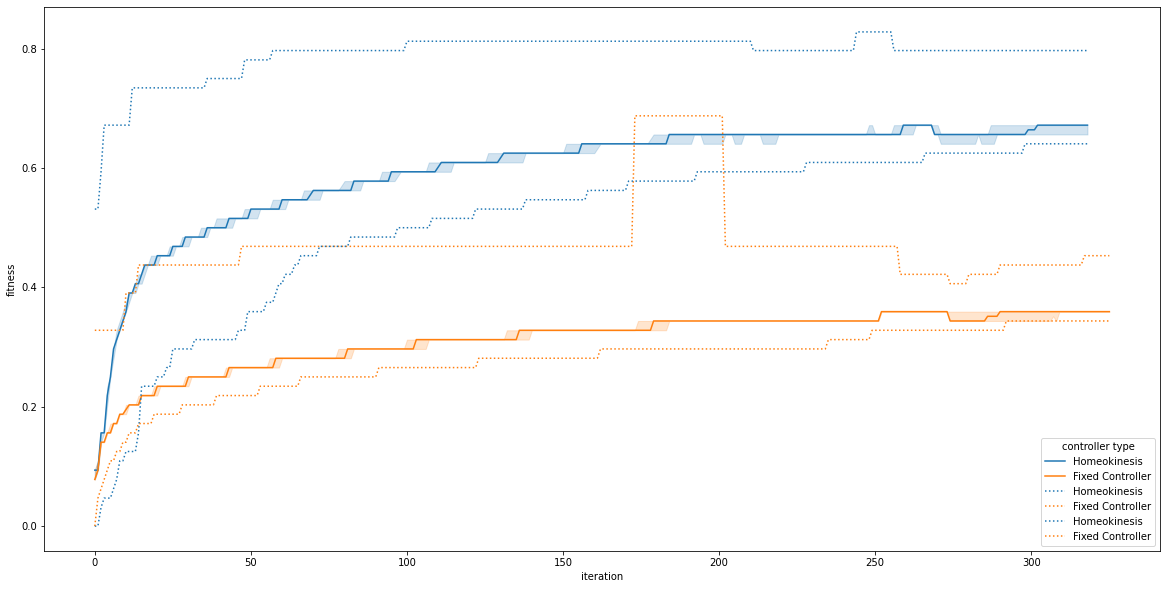

In [9]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data,x="iteration",y="fitness",hue="controller type",estimator=np.median,color='b')
sns.lineplot(data=fit_data,x="iteration",y="fitness",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=fit_data,x="iteration",y="fitness",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='b')

/tmp/ipykernel_50661/2119528321.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=fit_data,x="discretized number of robots",y="fitness",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='b')
/tmp/ipykernel_50661/2119528321.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=fit_data,x="discretized number of robots",y="fitness",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='b')


Text(0.5, 0, 'number of robots')

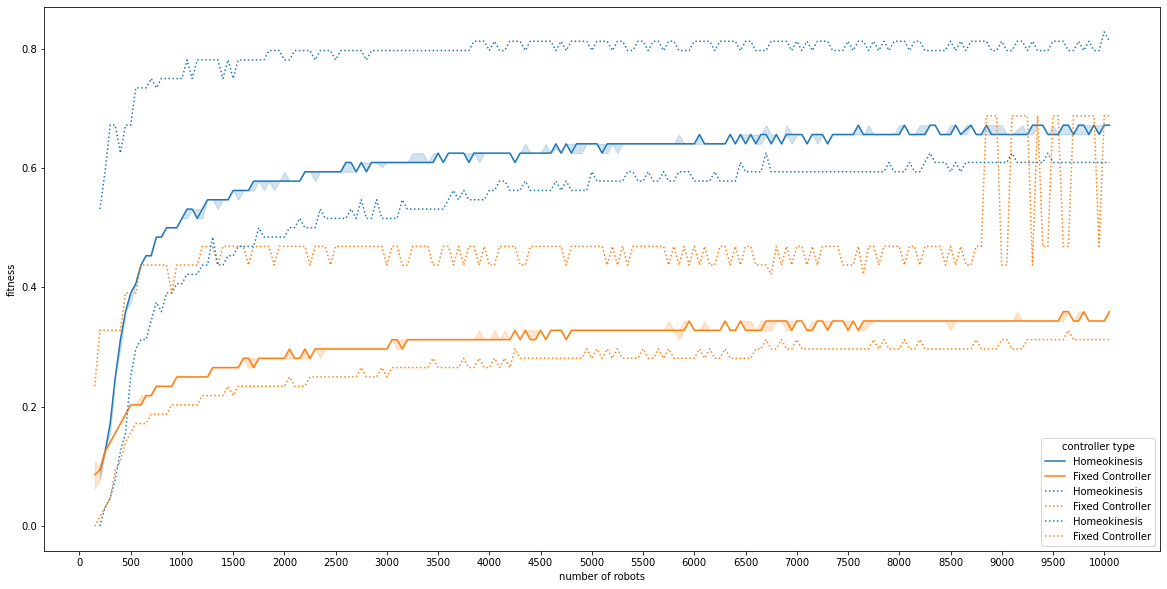

In [10]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data,x="discretized number of robots",y="fitness",hue="controller type",estimator=np.median,color='b')
sns.lineplot(data=fit_data,x="discretized number of robots",y="fitness",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=fit_data,x="discretized number of robots",y="fitness",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='b')
ax.set_xticks(range(0,10500,500))
ax.set_xlabel("number of robots")

## Diversity

### Matrix Descriptor

In [4]:
import importlib
importlib.reload(medf)

<module 'me_data_fcts' from '/home/leni/git/evolutionary_robotics_framework/experiments/scripts/me_data_fcts.py'>

In [5]:
parent_descs = []
for folder in os.listdir(mehk_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_component_descriptor(mehk_folder + "/" + folder + "/morph_descriptor.csv")
    sparsity = dict()
    for iter in range(len(parent_ids)):
        iter_descs = medf.filter_to_one_iteration(descriptors,parent_ids,iter)
        sparsity.update(medf.compute_sparsity({d[0]:np.array(d[1:-1]) for d in iter_descs},15,lambda v,w: np.linalg.norm(v-w)))
    descs = [[d[0],d[-1],folder] for d in descriptors]
    parent_descs += [d + [sparsity[d[1]]] for d in medf.filter_to_parent_pool(descs,parent_ids)]


meim_25_6_16-24-32-2848-3749627413
meim_25_6_16-25-2-2578-2456666270
meim_25_6_16-25-2-2768-2729908547
meim_30_6_13-25-55-5252-295499761
meim_4_6_16-59-49-9078-3493767385
meim_4_6_16-59-52-2124-2763705642
meim_5_6_10-50-42-2727-1635008145
meim_5_6_11-17-16-6981-221913695
meim_5_6_11-5-41-1708-1861126324
meim_5_6_7-15-41-1686-20808547
meim_6_6_0-23-4-4901-3236490257
meim_6_6_1-7-36-6550-3419932571
meim_6_6_12-28-38-8210-1037330512
meim_6_6_5-13-15-5219-3432938375


In [6]:

par_mdesc_data1 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","norm","replicate","sparsity"])
par_mdesc_data1["controller type"] = "Homeokinesis"

In [7]:
print(par_mdesc_data1)

        iteration  robot index  discretized number of robots  \
0               0            8                           200   
1               0           39                           200   
2               0           47                           200   
3               0           13                           200   
4               0            4                           200   
...           ...          ...                           ...   
346195        266        10026                         10000   
346196        266        10117                         10000   
346197        266        10188                         10000   
346198        266        10151                         10000   
346199        266        10153                         10000   

        number of individuals  number new inds      norm  \
0                         188              100  4.242641   
1                         188              100  1.732051   
2                         188              100  8.1

In [8]:
parent_descs = []
for folder in os.listdir(mefc_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mefc_folder + "/" + folder + "/parents_pool.csv")
    descriptors = medf.load_component_descriptor(mefc_folder + "/" + folder + "/morph_descriptor.csv")
    sparsity = dict()
    for iter in range(len(parent_ids)):
        iter_descs = medf.filter_to_one_iteration(descriptors,parent_ids,iter)
        sparsity.update(medf.compute_sparsity({d[0]:np.array(d[1:-1]) for d in iter_descs},15,lambda v,w: np.linalg.norm(v-w)))
    descs = [[d[0],d[-1],folder] for d in descriptors]
    parent_descs += [d + [sparsity[d[1]]] for d in medf.filter_to_parent_pool(descs,parent_ids)]


meim_28_4_11-28-51-1443-4031853478
meim_28_4_11-28-54-4846-1358932079
meim_28_4_11-28-57-7608-3617091664
meim_28_4_11-29-0-857-3681298804
meim_28_4_11-29-9-9642-416726483
meim_28_4_14-31-44-4230-3598983178
meim_28_4_19-42-29-9901-1413909619
meim_29_4_23-26-10-962-312197336
meim_29_4_23-3-27-7879-438409473
meim_30_4_2-47-50-415-2295905252
meim_30_4_3-22-55-5279-1110769008
meim_30_4_4-16-15-5993-3911015035
meim_30_4_8-18-32-2377-2908989017
meim_31_4_10-25-17-7843-2649367498
meim_31_4_12-15-41-1790-1095944290


In [9]:

par_mdesc_data2 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","norm","replicate","sparsity"])
par_mdesc_data2["controller type"] = "Fixed Controller"

In [10]:
mdesc_data = pd.concat([par_mdesc_data1,par_mdesc_data2])

In [11]:
new_data_list = []
for rep in mdesc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = mdesc_data.loc[mdesc_data["replicate"]==rep]
    ctrl_type = tmp_data["controller type"].drop_duplicates().values[0]
    print(ctrl_type)
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data["controller type"] = ctrl_type
        new_data_list.append(new_data)

mstd_data = pd.concat(new_data_list)
mstd_data.index  = [i for i in range(len(mstd_data))]


meim_25_6_16-24-32-2848-3749627413
Homeokinesis
meim_25_6_16-25-2-2578-2456666270
Homeokinesis
meim_25_6_16-25-2-2768-2729908547
Homeokinesis
meim_30_6_13-25-55-5252-295499761
Homeokinesis
meim_4_6_16-59-49-9078-3493767385
Homeokinesis
meim_4_6_16-59-52-2124-2763705642
Homeokinesis
meim_5_6_10-50-42-2727-1635008145
Homeokinesis
meim_5_6_11-17-16-6981-221913695
Homeokinesis
meim_5_6_11-5-41-1708-1861126324
Homeokinesis
meim_5_6_7-15-41-1686-20808547
Homeokinesis
meim_6_6_0-23-4-4901-3236490257
Homeokinesis
meim_6_6_1-7-36-6550-3419932571
Homeokinesis
meim_6_6_12-28-38-8210-1037330512
Homeokinesis
meim_6_6_5-13-15-5219-3432938375
Homeokinesis
meim_28_4_11-28-51-1443-4031853478
Fixed Controller
meim_28_4_11-28-54-4846-1358932079
Fixed Controller
meim_28_4_11-28-57-7608-3617091664
Fixed Controller
meim_28_4_11-29-0-857-3681298804
Fixed Controller
meim_28_4_11-29-9-9642-416726483
Fixed Controller
meim_28_4_14-31-44-4230-3598983178
Fixed Controller
meim_28_4_19-42-29-9901-1413909619
Fixed Co

/tmp/ipykernel_50661/2723585212.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mstd_data,x="iteration",y="norm",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
/tmp/ipykernel_50661/2723585212.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mstd_data,x="iteration",y="norm",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')


Text(0, 0.5, 'Morphological matrix descriptor diversity')

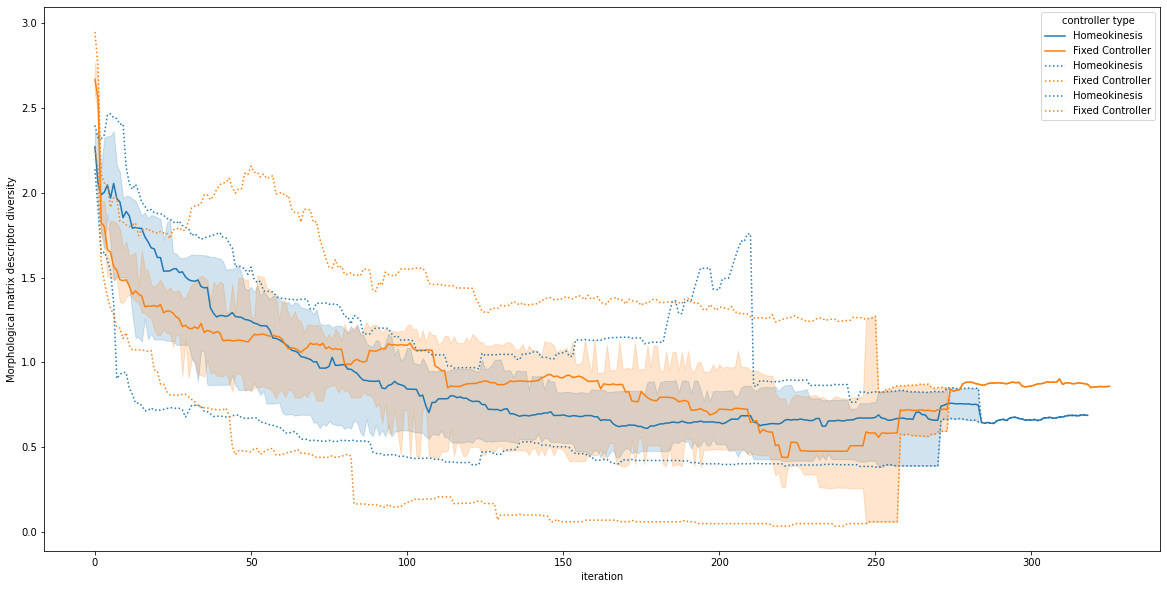

In [67]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=mstd_data,x="iteration",y="norm",hue="controller type", estimator=np.median,color='g')
sns.lineplot(data=mstd_data,x="iteration",y="norm",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=mstd_data,x="iteration",y="norm",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological matrix descriptor diversity")

/tmp/ipykernel_58018/2653804355.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mstd_data,x="iteration",y="sparsity",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
/tmp/ipykernel_58018/2653804355.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mstd_data,x="iteration",y="sparsity",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')


Text(0, 0.5, 'Morphological sparsity')

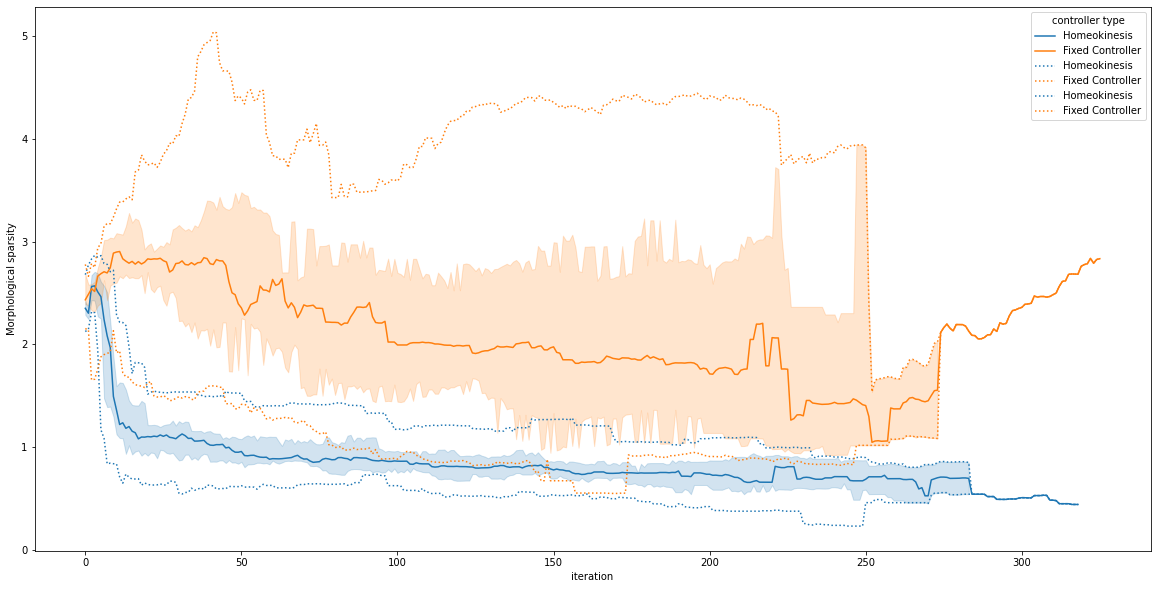

In [13]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=mstd_data,x="iteration",y="sparsity",hue="controller type", estimator=np.median,color='g')
sns.lineplot(data=mstd_data,x="iteration",y="sparsity",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=mstd_data,x="iteration",y="sparsity",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological sparsity")

### Components Descriptor

In [20]:
import importlib
importlib.reload(medf)

<module 'me_data_fcts' from '/home/leni/git/evolutionary_robotics_framework/experiments/scripts/me_data_fcts.py'>

In [26]:
parent_descs = []
for folder in os.listdir(mehk_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data1 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data1["controller type"] = "Homeokinesis"

meim_25_6_16-24-32-2848-3749627413
['8', 0.180001, 0.233817, 0.419637, 0.406461, 0.125, 0.0, 0.0, 0.0625, 0.6692591095980689, 0.6545047790352642, 0.13975424859373686]
[8, 0.180001, 0.233817, 0.419637, 0.406461, 2.0, 0.0, 0.0, 1.0, 0.6692591095980689, 0.6545047790352642, 0.13975424859373686, 'meim_25_6_16-24-32-2848-3749627413']
meim_25_6_16-25-2-2578-2456666270
['8', 0.135273, 0.18, 0.421455, 0.520661, 0.0, 0.0, 0.125, 0.0, 0.7176600716739089, 0.7066901573355894, 0.125]
[8, 0.135273, 0.18, 0.421455, 0.520661, 0.0, 0.0, 2.0, 0.0, 0.7176600716739089, 0.7066901573355894, 0.125, 'meim_25_6_16-25-2-2578-2456666270']
meim_25_6_16-25-2-2768-2729908547
['44', 0.144001, 0.162184, 0.347636, 0.749061, 0.0625, 0.0, 0.0, 0.0, 0.8560895736276666, 0.8538050761584871, 0.0625]
[44, 0.144001, 0.162184, 0.347636, 0.749061, 1.0, 0.0, 0.0, 0.0, 0.8560895736276666, 0.8538050761584871, 0.0625, 'meim_25_6_16-25-2-2768-2729908547']
meim_30_6_13-25-55-5252-295499761
['63', 0.161819, 0.179999, 0.419636, 0.461307

In [27]:
parent_descs = []
for folder in os.listdir(mefc_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mefc_folder + "/" + folder + "/parents_pool.csv")
    descriptors = medf.load_feature_descriptor(mefc_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data2 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data2["controller type"] = "Fixed Controller"

meim_28_4_11-28-51-1443-4031853478
meim_28_4_11-28-54-4846-1358932079
meim_28_4_11-28-57-7608-3617091664
meim_28_4_11-29-0-857-3681298804
meim_28_4_11-29-9-9642-416726483
meim_28_4_14-31-44-4230-3598983178
meim_28_4_19-42-29-9901-1413909619
meim_29_4_23-26-10-962-312197336
meim_29_4_23-3-27-7879-438409473
meim_30_4_2-47-50-415-2295905252
meim_30_4_3-22-55-5279-1110769008
meim_30_4_4-16-15-5993-3911015035
meim_30_4_8-18-32-2377-2908989017
meim_31_4_10-25-17-7843-2649367498
meim_31_4_12-15-41-1790-1095944290


In [28]:
desc_data = pd.concat([par_desc_data1,par_desc_data2]).reset_index(drop=True)


In [29]:
new_data_list = []
for rep in desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = desc_data.loc[desc_data["replicate"]==rep]
    ctrl_type = tmp_data["controller type"].drop_duplicates().values[0]
    print(ctrl_type)
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data["controller type"] = ctrl_type
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)
std_data.index  = [i for i in range(len(std_data))]


meim_25_6_16-24-32-2848-3749627413
Homeokinesis
meim_25_6_16-25-2-2578-2456666270
Homeokinesis
meim_25_6_16-25-2-2768-2729908547
Homeokinesis
meim_30_6_13-25-55-5252-295499761
Homeokinesis
meim_4_6_16-59-49-9078-3493767385
Homeokinesis
meim_4_6_16-59-52-2124-2763705642
Homeokinesis
meim_5_6_10-50-42-2727-1635008145
Homeokinesis
meim_5_6_11-17-16-6981-221913695
Homeokinesis
meim_5_6_11-5-41-1708-1861126324
Homeokinesis
meim_5_6_7-15-41-1686-20808547
Homeokinesis
meim_6_6_0-23-4-4901-3236490257
Homeokinesis
meim_6_6_1-7-36-6550-3419932571
Homeokinesis
meim_6_6_12-28-38-8210-1037330512
Homeokinesis
meim_6_6_5-13-15-5219-3432938375
Homeokinesis
meim_28_4_11-28-51-1443-4031853478
Fixed Controller
meim_28_4_11-28-54-4846-1358932079
Fixed Controller
meim_28_4_11-28-57-7608-3617091664
Fixed Controller
meim_28_4_11-29-0-857-3681298804
Fixed Controller
meim_28_4_11-29-9-9642-416726483
Fixed Controller
meim_28_4_14-31-44-4230-3598983178
Fixed Controller
meim_28_4_19-42-29-9901-1413909619
Fixed Co

In [30]:
print(std_data)

      iteration  robot index  discretized number of robots  \
0             0    54.213915                           0.0   
1             1    55.858858                           0.0   
2             2    66.850879                           0.0   
3             3    68.161646                           0.0   
4             4    74.651683                           0.0   
...         ...          ...                           ...   
7024        208  2988.176914                           0.0   
7025        209  3012.697907                           0.0   
7026        210  3037.780880                           0.0   
7027        211  3079.824698                           0.0   
7028        212  3101.189207                           0.0   

      number of individuals  number new inds     width     depth    height  \
0                       0.0              0.0  0.072891  0.077714  0.106592   
1                       0.0              0.0  0.073756  0.078575  0.104988   
2                    

/tmp/ipykernel_33210/4027320777.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
/tmp/ipykernel_33210/4027320777.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')


Text(0, 0.5, 'Morphological components descriptor diversity')

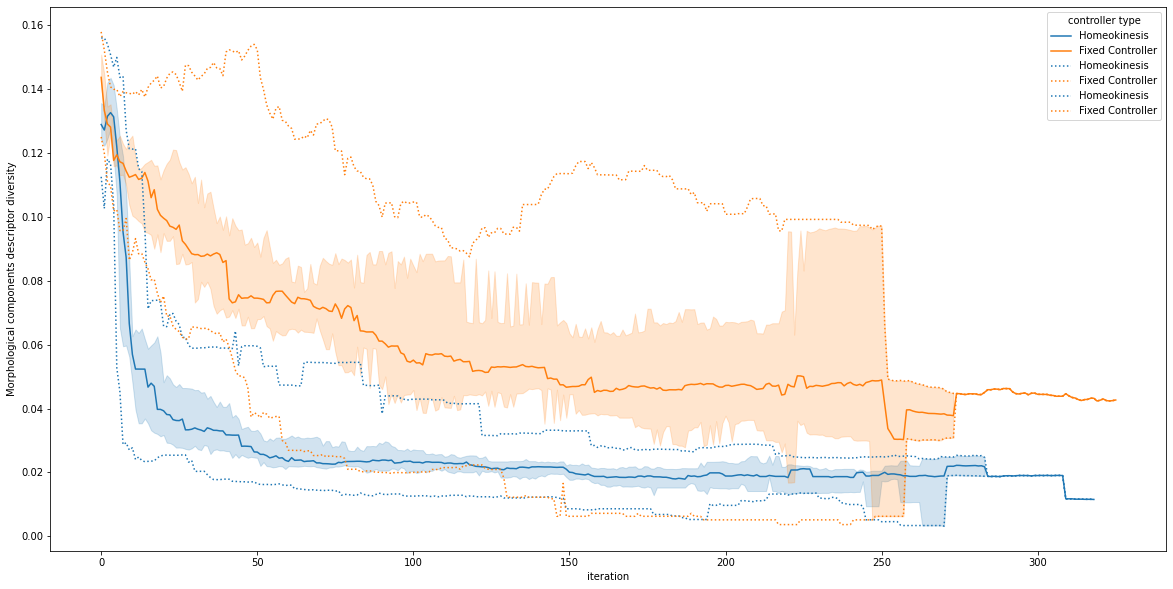

In [19]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller type", estimator=np.median,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological components descriptor diversity")

/tmp/ipykernel_33210/1158125166.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="skeleton norm",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
/tmp/ipykernel_33210/1158125166.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="skeleton norm",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')


Text(0, 0.5, 'Morphological components descriptor diversity')

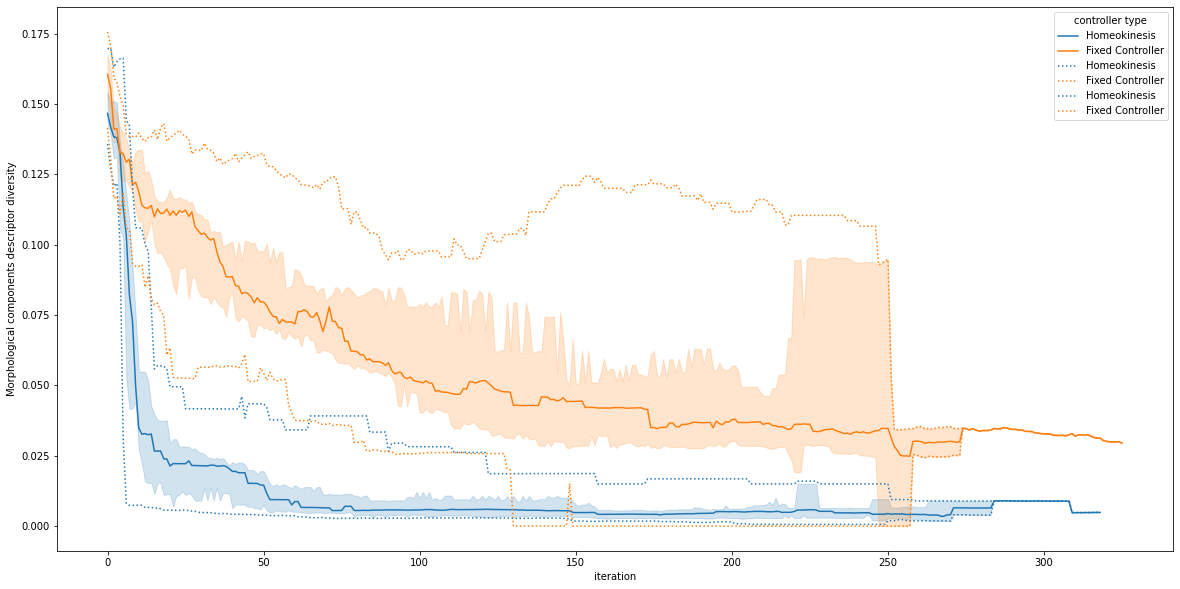

In [31]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="skeleton norm",hue="controller type", estimator=np.median,color='g')
sns.lineplot(data=std_data,x="iteration",y="skeleton norm",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=std_data,x="iteration",y="skeleton norm",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological components descriptor diversity")

/tmp/ipykernel_33210/754869786.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="components norm",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
/tmp/ipykernel_33210/754869786.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="components norm",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')


Text(0, 0.5, 'Morphological components descriptor diversity')

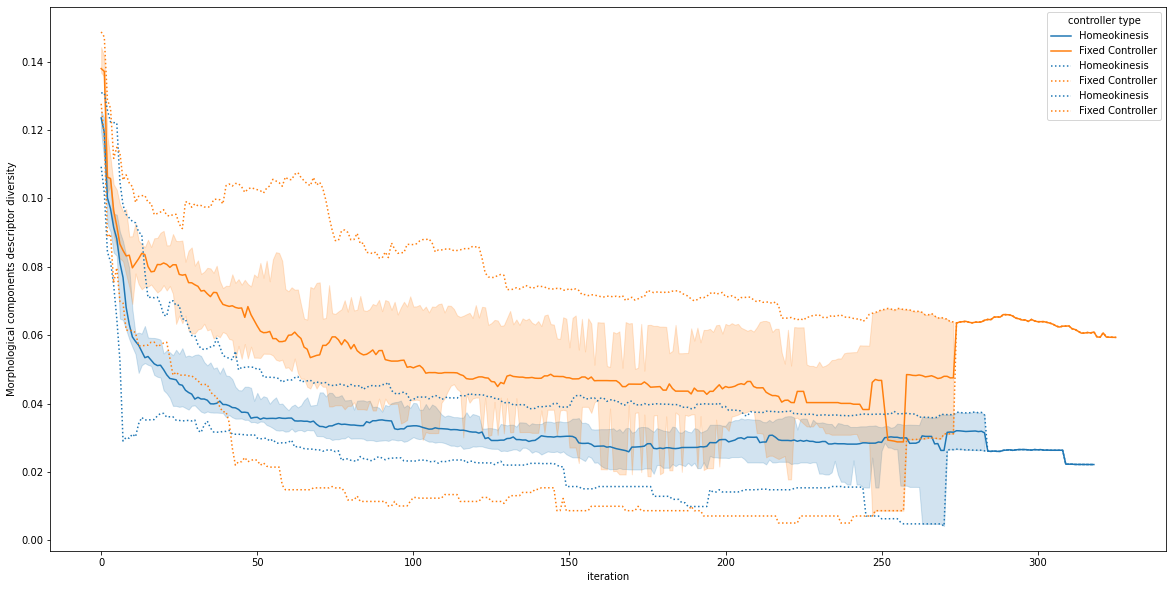

In [32]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="components norm",hue="controller type", estimator=np.median,color='g')
sns.lineplot(data=std_data,x="iteration",y="components norm",hue="controller type",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=std_data,x="iteration",y="components norm",hue="controller type",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological components descriptor diversity")

### Actuators and Sensors Distribution

In [21]:
desc_data = pd.merge(desc_data,fit_data,how="left",on=["iteration","robot index","replicate","discretized number of robots","number of individuals","number new inds","controller type"])
desc_data = desc_data.drop_duplicates(subset=['robot index','replicate'])

<Axes: xlabel='sensors', ylabel='fitness'>

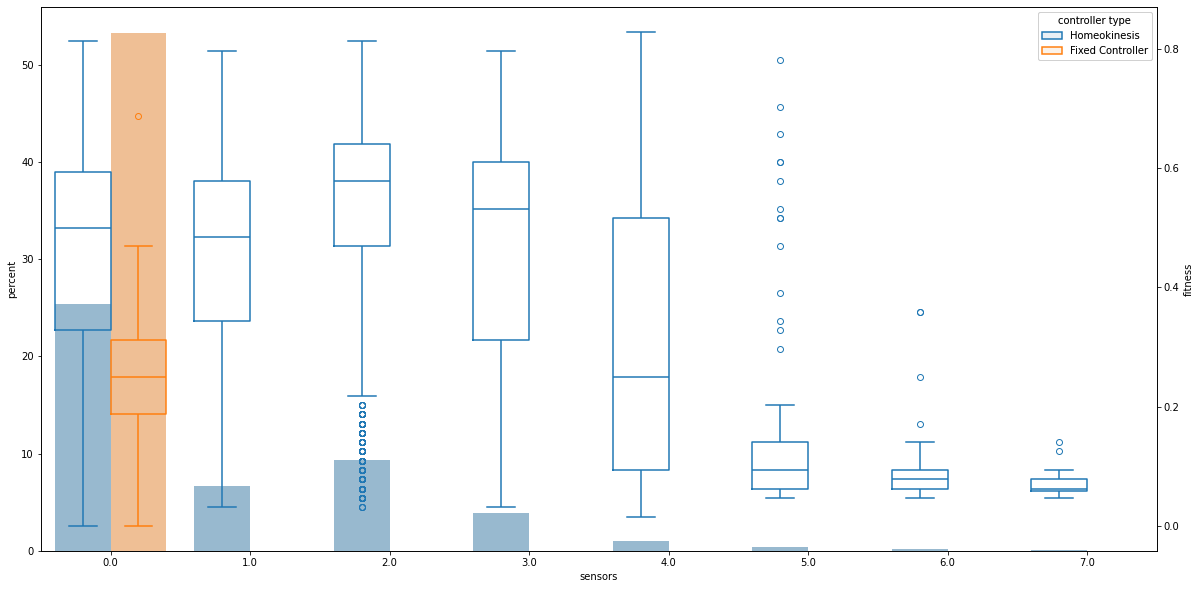

In [22]:
fig = plt.gcf()
fig.set_size_inches(20,10)

sns.countplot(data=desc_data,x="sensors",hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=desc_data,x="sensors",y="fitness",hue="controller type",ax=ax,fill=False)

<Axes: xlabel='wheels', ylabel='fitness'>

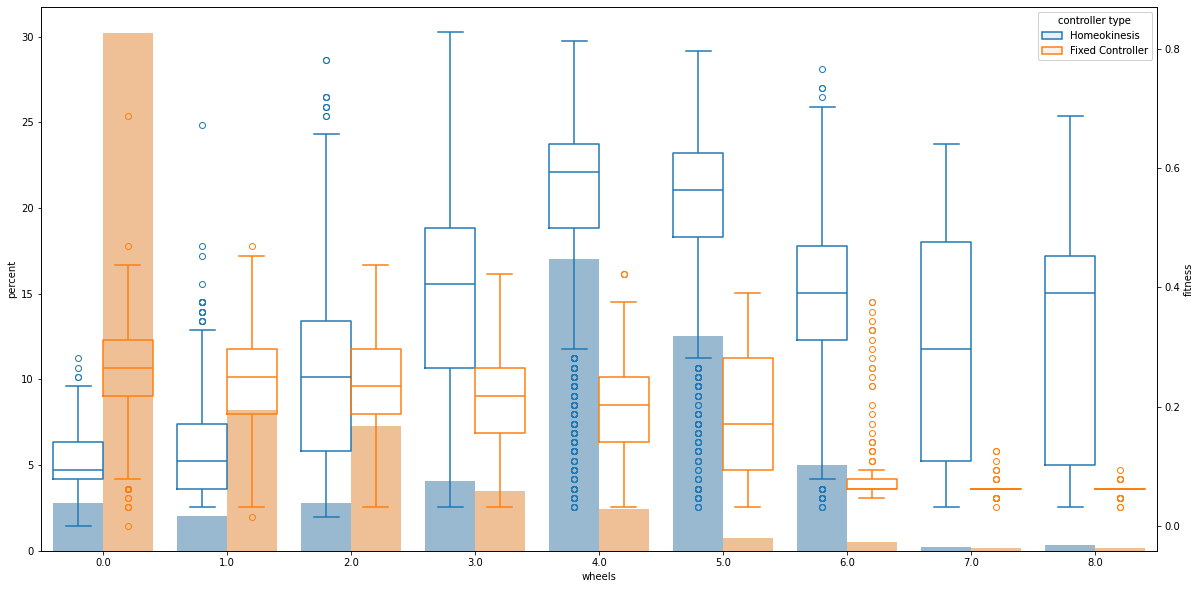

In [23]:
fig = plt.gcf()
fig.set_size_inches(20,10)

sns.countplot(data=desc_data,x="wheels",hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=desc_data,x="wheels",y="fitness",hue="controller type",ax=ax,fill=False)

<Axes: xlabel='joints', ylabel='fitness'>

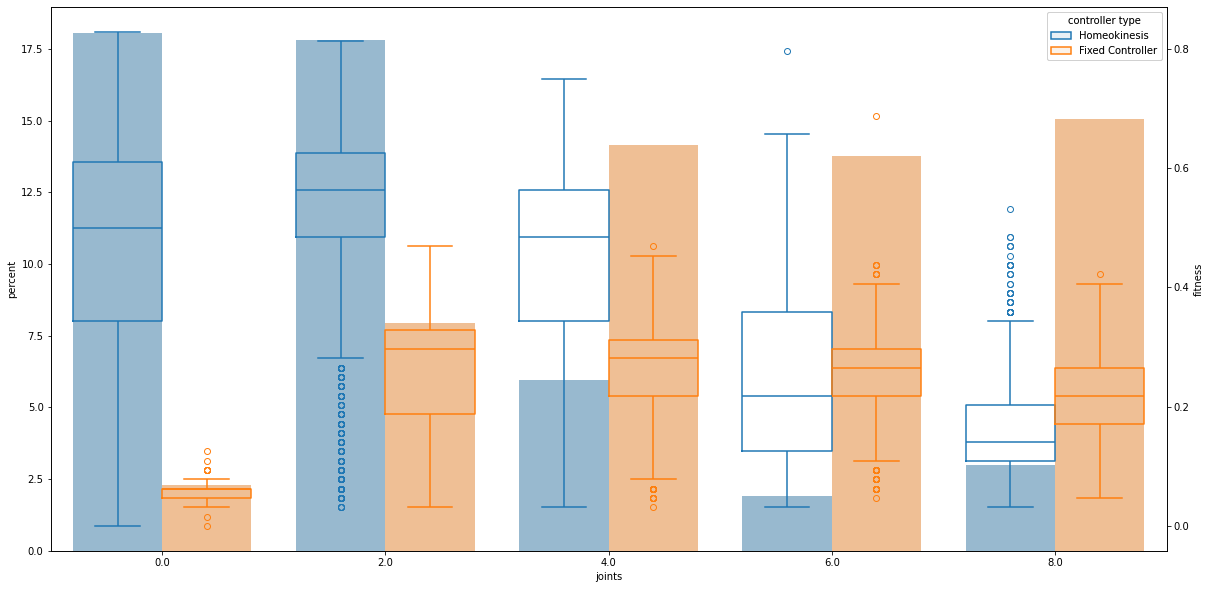

In [24]:
fig = plt.gcf()
fig.set_size_inches(20,10)

sns.countplot(data=desc_data,x="joints",hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=desc_data,x="joints",y="fitness",hue="controller type",ax=ax,fill=False)

### T-SNE

In [47]:
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tdesc_data1 = par_desc_data1.drop_duplicates(subset=['robot index', 'replicate'])
tdesc_data1 = par_desc_data1[["width","depth","height","voxels","wheels","sensors","joints","casters"]]
tsne_results1 = tsne.fit_transform(tdesc_data1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 207300 samples in 0.489s...
[t-SNE] Computed neighbors for 207300 samples in 151.000s...
[t-SNE] Computed conditional probabilities for sample 1000 / 207300
[t-SNE] Computed conditional probabilities for sample 2000 / 207300
[t-SNE] Computed conditional probabilities for sample 3000 / 207300
[t-SNE] Computed conditional probabilities for sample 4000 / 207300
[t-SNE] Computed conditional probabilities for sample 5000 / 207300
[t-SNE] Computed conditional probabilities for sample 6000 / 207300
[t-SNE] Computed conditional probabilities for sample 7000 / 207300
[t-SNE] Computed conditional probabilities for sample 8000 / 207300
[t-SNE] Computed conditional probabilities for sample 9000 / 207300
[t-SNE] Computed conditional probabilities for sample 10000 / 207300
[t-SNE] Computed conditional probabilities for sample 11000 / 207300
[t-SNE] Computed conditional probabilities for sample 12000 / 207300
[t-SNE] Computed conditional prob

In [49]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tdesc_data2 = par_desc_data2.drop_duplicates(subset=['robot index', 'replicate'])
tdesc_data2 = par_desc_data2[["width","depth","height","voxels","wheels","sensors","joints","casters"]]
tsne_results2 = tsne.fit_transform(tdesc_data2)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 356700 samples in 1.010s...
[t-SNE] Computed neighbors for 356700 samples in 117.645s...
[t-SNE] Computed conditional probabilities for sample 1000 / 356700
[t-SNE] Computed conditional probabilities for sample 2000 / 356700
[t-SNE] Computed conditional probabilities for sample 3000 / 356700
[t-SNE] Computed conditional probabilities for sample 4000 / 356700
[t-SNE] Computed conditional probabilities for sample 5000 / 356700
[t-SNE] Computed conditional probabilities for sample 6000 / 356700
[t-SNE] Computed conditional probabilities for sample 7000 / 356700
[t-SNE] Computed conditional probabilities for sample 8000 / 356700
[t-SNE] Computed conditional probabilities for sample 9000 / 356700
[t-SNE] Computed conditional probabilities for sample 10000 / 356700
[t-SNE] Computed conditional probabilities for sample 11000 / 356700
[t-SNE] Computed conditional probabilities for sample 12000 / 356700
[t-SNE] Computed conditional prob

In [50]:
df_tsne_results1 = pd.DataFrame(tsne_results1)
df_tsne_results1['controller type']='Homeokinesis'
df_tsne_results2 = pd.DataFrame(tsne_results2)
df_tsne_results2['controller type']='Fixed Controller'
df_tsne_all = [df_tsne_results1, df_tsne_results2]
df_tsne_all = pd.concat(df_tsne_all)

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


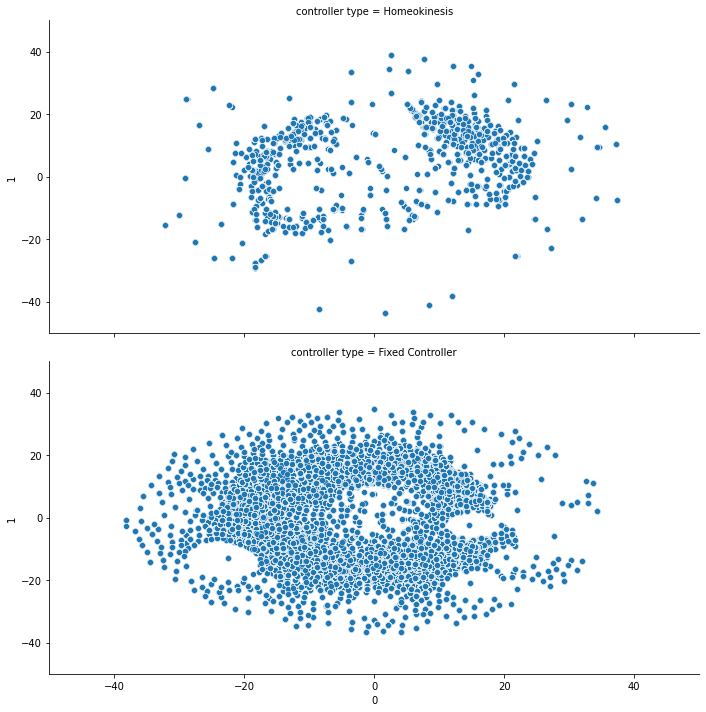

In [57]:
g = sns.relplot(
    x=0, y=1,
    row="controller type",
    data=df_tsne_all,
    legend="full",aspect=2
)
g.set(xlim=[-50,50],ylim=[-50,50])

## Robots Selection

In [7]:
pareto_datas = []
selected_robots = []
for folder in os.listdir(mehk_folder):
    if(folder.split("_")[0] != "meim"):
        continue
    exp_folder = mehk_folder + "/" + folder
    pareto_set = pd.read_csv(exp_folder + "/pareto_set_L2.csv")
    pareto_set["replicate"] = folder
    pareto_set["controller type"] = "Homeokinesis"
    f_idx = (np.abs(pareto_set["fitness"] - pareto_set["fitness"].median()).argmin())
    s_idx = (np.abs(pareto_set["sparsity"] - pareto_set["sparsity"].median()).argmin())
    median_idx = 0
    if f_idx != s_idx and pareto_set.iloc[f_idx]["fitness"] > pareto_set.iloc[s_idx]["fitness"]:
            median_idx = f_idx
    else:
        median_idx = s_idx
    selected_robots.append(pd.concat([pareto_set.iloc[[pareto_set['fitness'].idxmax()]],
                                      pareto_set.iloc[[pareto_set['sparsity'].idxmax()]],
                                      pareto_set.iloc[[median_idx]]]))
    pareto_datas.append(pareto_set)

pareto_data1 = pd.concat(pareto_datas)
pareto_data1 = pareto_data1.reset_index(drop=True)
selected_robots1 = pd.concat(selected_robots)
print(selected_robots1)

    fitness  sparsity     id                           replicate  \
1  0.796875  0.000000   1799  meim_25_6_16-24-32-2848-3749627413   
2  0.531250  2.800000   3026  meim_25_6_16-24-32-2848-3749627413   
0  0.625000  0.733333    901  meim_25_6_16-24-32-2848-3749627413   
2  0.796875  0.000000   5908   meim_25_6_16-25-2-2578-2456666270   
6  0.468750  4.600000  10879   meim_25_6_16-25-2-2578-2456666270   
4  0.578125  1.666667   8851   meim_25_6_16-25-2-2578-2456666270   
5  0.812500  0.000000  10422   meim_25_6_16-25-2-2768-2729908547   
4  0.453125  3.200000   6406   meim_25_6_16-25-2-2768-2729908547   
6  0.609375  1.800000  11549   meim_25_6_16-25-2-2768-2729908547   
6  0.796875  0.000000   9017   meim_30_6_13-25-55-5252-295499761   
4  0.484375  7.333333   1065   meim_30_6_13-25-55-5252-295499761   
0  0.562500  5.133333    450   meim_30_6_13-25-55-5252-295499761   
0  0.750000  0.000000   1549   meim_4_6_16-59-49-9078-3493767385   
6  0.437500  6.400000   5268   meim_4_6_16-59-49

In [8]:
pareto_datas = []
selected_robots = []
for folder in os.listdir(mefc_folder):
    if(folder.split("_")[0] != "meim"):
        continue
    exp_folder = mefc_folder + "/" + folder
    pareto_set = pd.read_csv(exp_folder + "/pareto_set_L2.csv")
    pareto_set["replicate"] = folder
    pareto_set["controller type"] = "Fixed Controller"
    f_idx = (np.abs(pareto_set["fitness"] - pareto_set["fitness"].median()).argmin())
    s_idx = (np.abs(pareto_set["sparsity"] - pareto_set["sparsity"].median()).argmin())
    median_idx = 0
    if f_idx != s_idx and pareto_set.iloc[f_idx]["fitness"] > pareto_set.iloc[s_idx]["fitness"]:
            median_idx = f_idx
    else:
        median_idx = s_idx
    selected_robots.append(pd.concat([pareto_set.iloc[[pareto_set['fitness'].idxmax()]],
                                      pareto_set.iloc[[pareto_set['sparsity'].idxmax()]],
                                      pareto_set.iloc[[median_idx]]]))
    pareto_datas.append(pareto_set)

pareto_data2 = pd.concat(pareto_datas)
pareto_data2 = pareto_data2.reset_index(drop=True)
selected_robots2 = pd.concat(selected_robots)
print(selected_robots2)

    fitness   sparsity     id                           replicate  \
5  0.437500   0.000000   7821  meim_28_4_11-28-51-1443-4031853478   
3  0.265625  10.266667   5232  meim_28_4_11-28-51-1443-4031853478   
1  0.328125   8.333333   2639  meim_28_4_11-28-51-1443-4031853478   
1  0.421875   0.000000   2757  meim_28_4_11-28-54-4846-1358932079   
4  0.234375  10.533333   9522  meim_28_4_11-28-54-4846-1358932079   
2  0.359375   8.266667   5142  meim_28_4_11-28-54-4846-1358932079   
2  0.421875   0.333333   7265  meim_28_4_11-28-57-7608-3617091664   
0  0.234375  10.266667   4720  meim_28_4_11-28-57-7608-3617091664   
3  0.312500   9.866667   7777  meim_28_4_11-28-57-7608-3617091664   
2  0.687500   7.400000   8834    meim_28_4_11-29-0-857-3681298804   
0  0.234375  10.600000   2639    meim_28_4_11-29-0-857-3681298804   
1  0.281250   9.733333   5449    meim_28_4_11-29-0-857-3681298804   
2  0.421875   6.600000   4776    meim_28_4_11-29-9-9642-416726483   
5  0.234375  10.600000  10468    m

In [9]:
pareto_data = pd.concat([pareto_data1,pareto_data2])
selected_robots = pd.concat([selected_robots1,selected_robots2])

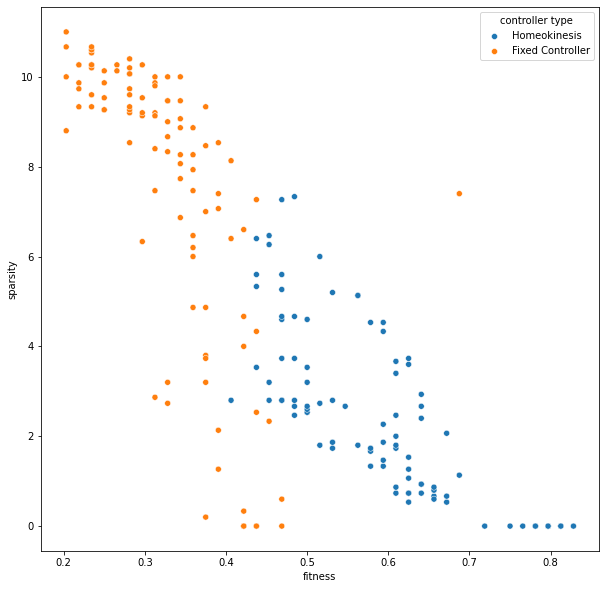

In [10]:
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = sns.scatterplot(data=pareto_data,x="fitness",y="sparsity",hue="controller type")


/tmp/ipykernel_9469/1122497472.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=pareto_data,x="fitness",y="sparsity",hue="controller type",estimator=np.median,ci=None)
/tmp/ipykernel_9469/1122497472.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pareto_data,x="fitness",y="sparsity",hue="controller type",linestyle=":",estimator=np.max,ci=None)
/tmp/ipykernel_9469/1122497472.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pareto_data,x="fitness",y="sparsity",hue="controller type",linestyle=":",estimator=np.min,ci=None)


<Axes: xlabel='fitness', ylabel='sparsity'>

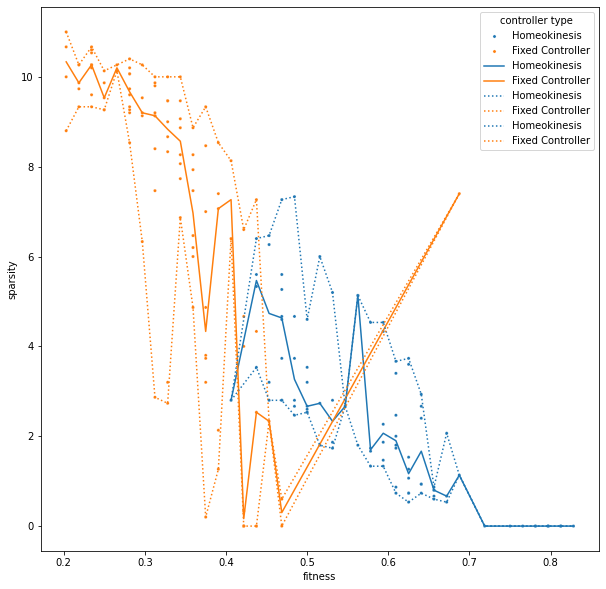

In [17]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.scatterplot(data=pareto_data,x="fitness",y="sparsity",hue="controller type",s=10)
ax = sns.lineplot(data=pareto_data,x="fitness",y="sparsity",hue="controller type",estimator=np.median,ci=None)
sns.lineplot(data=pareto_data,x="fitness",y="sparsity",hue="controller type",linestyle=":",estimator=np.max,ci=None)
sns.lineplot(data=pareto_data,x="fitness",y="sparsity",hue="controller type",linestyle=":",estimator=np.min,ci=None)

In [6]:
pareto_data = pd.concat([pareto_data1,pareto_data2])
selected_robots = pd.concat([selected_robots1,selected_robots2])
pareto_data = pd.merge(desc_data,pareto_data,how="inner",left_on=["robot index","controller type","fitness"],right_on=["id","controller type","fitness"])
selected_robots_data = pd.merge(desc_data,selected_robots,how="inner",left_on=["robot index","controller type","fitness"],right_on=["id","controller type","fitness"])

NameError: name 'desc_data' is not defined

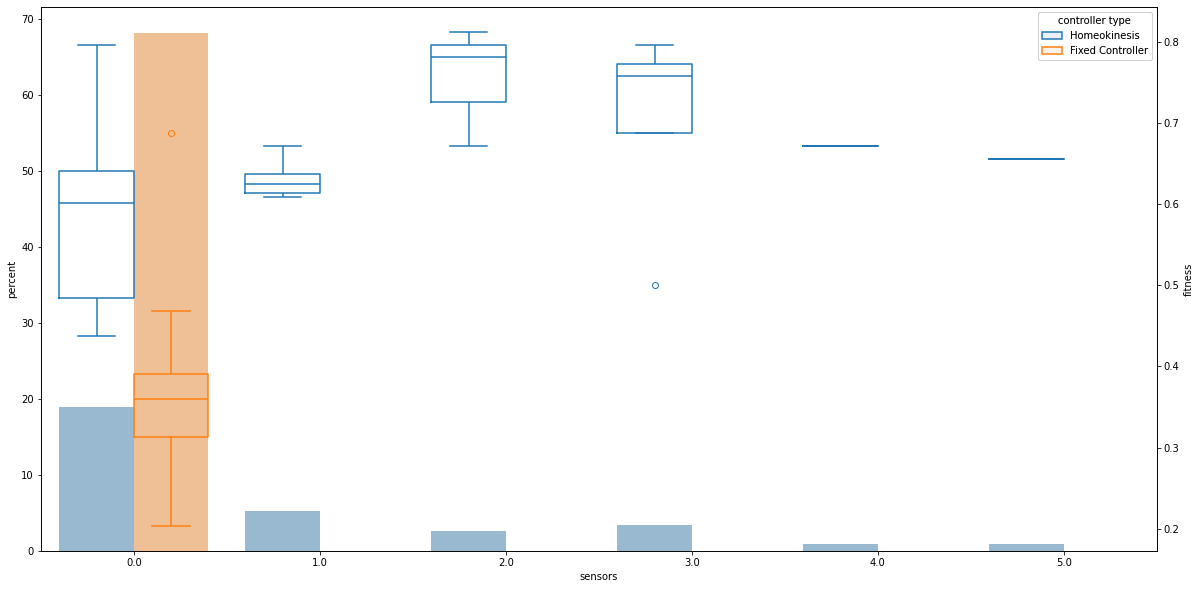

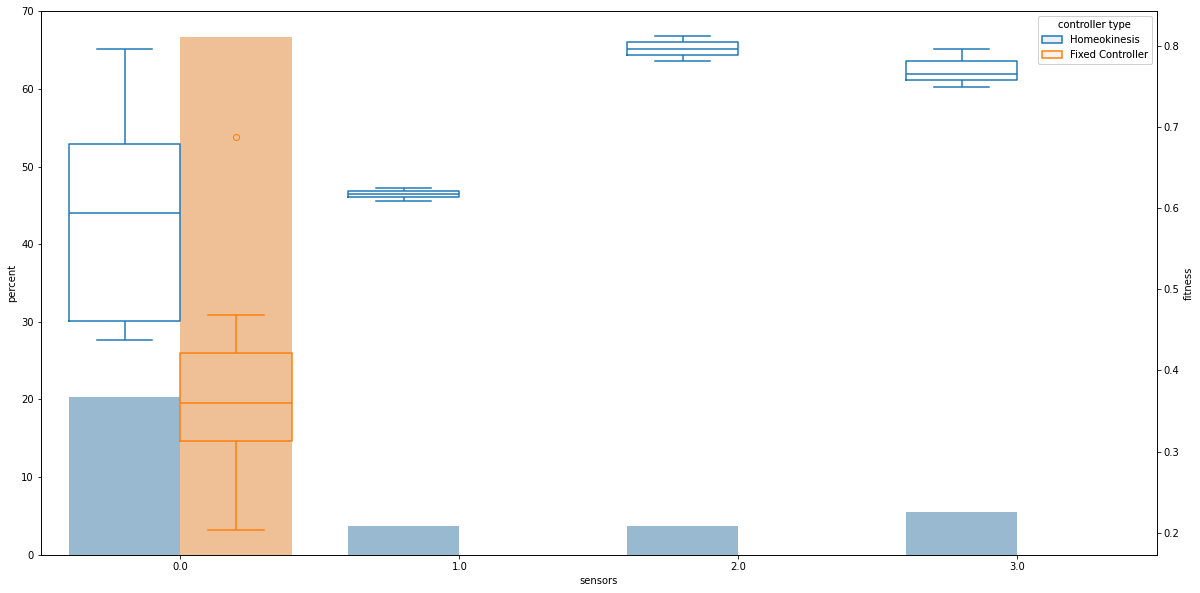

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
component = "sensors"
sns.countplot(data=pareto_data,x=component,hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=pareto_data,x=component,y="fitness",hue="controller type",ax=ax,fill=False)
plt.show()
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.countplot(data=selected_robots_data,x=component,hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=selected_robots_data,x=component,y="fitness",hue="controller type",ax=ax,fill=False)
plt.show()


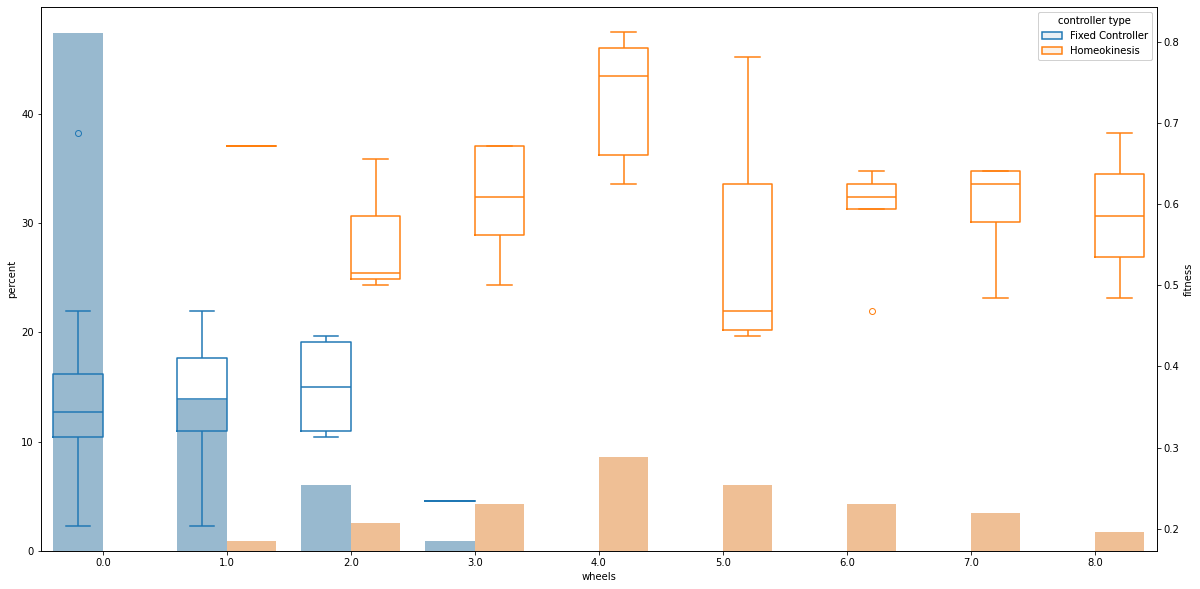

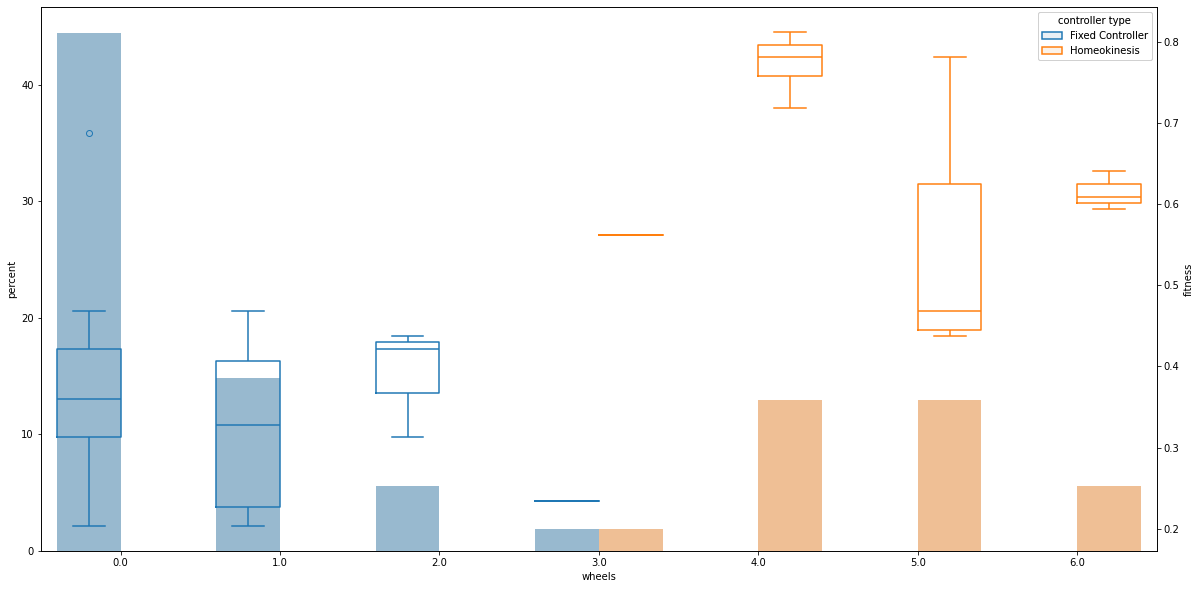

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
component = "wheels"
sns.countplot(data=pareto_data,x=component,hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=pareto_data,x=component,y="fitness",hue="controller type",ax=ax,fill=False)
plt.show()
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.countplot(data=selected_robots_data,x=component,hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=selected_robots_data,x=component,y="fitness",hue="controller type",ax=ax,fill=False)
plt.show()


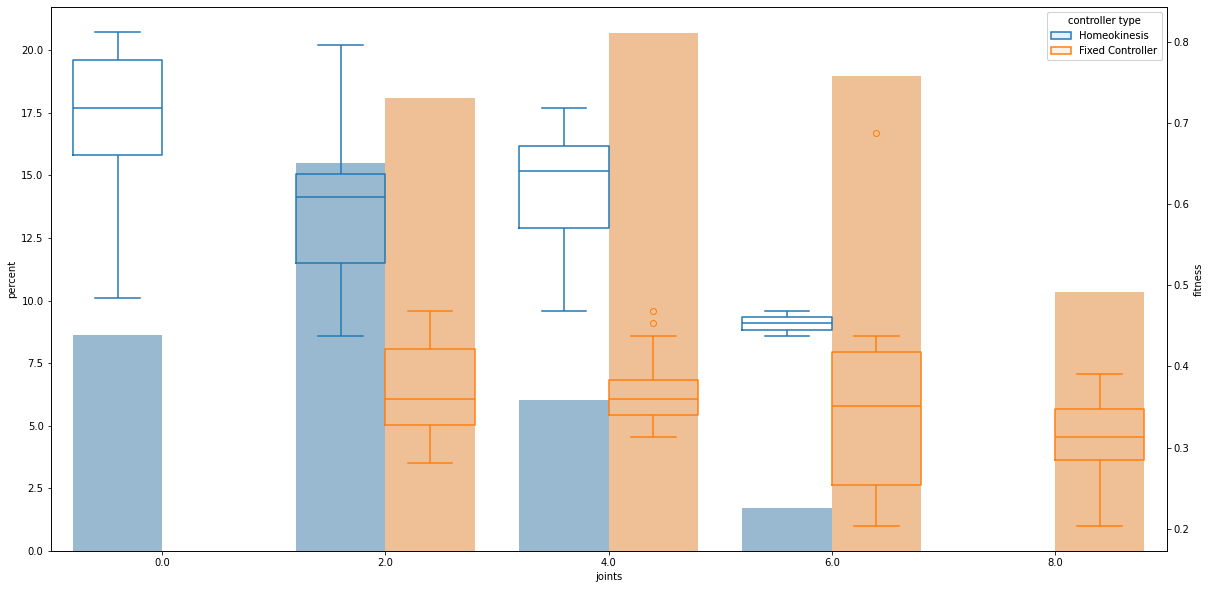

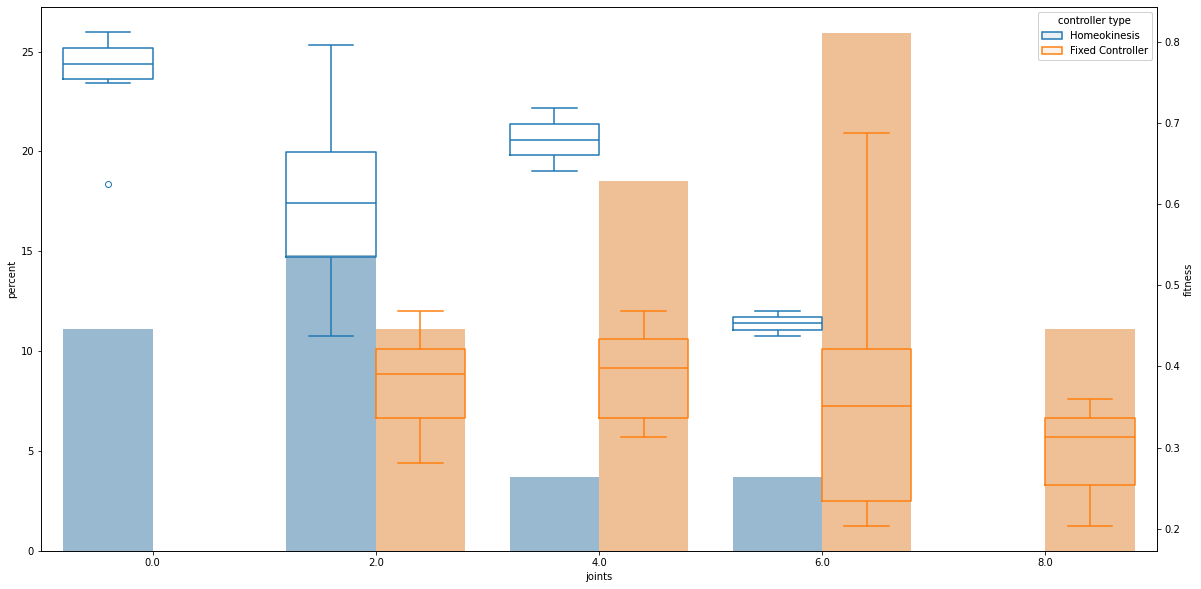

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
component = "joints"
sns.countplot(data=pareto_data,x=component,hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=pareto_data,x=component,y="fitness",hue="controller type",ax=ax,fill=False)
plt.show()
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.countplot(data=selected_robots_data,x=component,hue="controller type",stat="percent",alpha=0.5)
ax = plt.twinx()
sns.boxplot(data=selected_robots_data,x=component,y="fitness",hue="controller type",ax=ax,fill=False)
plt.show()


# Downstream tasks: MEHK vs MEFC vs MELAI

## MEHK VS MEFC

### Best performance

In [3]:
import importlib
importlib.reload(medf)

<module 'me_data_fcts' from '/home/leni/git/evolutionary_robotics_framework/experiments/scripts/me_data_fcts.py'>

In [5]:
ds_exp_folders = [["homeokinesis","locomotion corridor","/home/leni/remote-folder/meim_ds_tasks2/mehk/loco_corr/"],
                ["fixed controller","locomotion corridor","/home/leni/remote-folder/meim_ds_tasks2/mefc/loco_corr/"],
                ["homeokinesis","locomotion rough","/home/leni/remote-folder/meim_ds_tasks2/mehk/loco_rough/"],
                ["homeokinesis","push object","/home/leni/remote-folder/meim_ds_tasks2/mehk/push_object/"],
                ["fixed controller","locomotion rough","/home/leni/remote-folder/meim_ds_tasks2/mefc/loco_rough/"],
                ["fixed controller","push object","/home/leni/remote-folder/meim_ds_tasks2/mefc/push_object/"],
                ["homeokinesis","hill climbing","/home/leni/remote-folder/meim_ds_tasks2/mehk/hill_climb/"],
                ["fixed controller","hill climbing","/home/leni/remote-folder/meim_ds_tasks2/mefc/hill_climbing/"],
                ["homeokinesis","multi targets2","/home/leni/remote-folder/meim_ds_tasks2/mehk/multi_targets2/"],
                ["fixed controller","multi targets2","/home/leni/remote-folder/meim_ds_tasks2/mefc/multi_targets2/"]]

In [6]:
ds_data_list = []
for exp_folder in ds_exp_folders:
    fit_lines = []
    for folder in os.listdir(exp_folder[2]):
        if folder.split("_")[0] != "nipes":
            continue
        print(folder)
        exp_path = exp_folder[2] + "/" + folder
        parameters = nidf.read_parameters(exp_path + "/parameters.csv")
        robot_id = parameters["#robotPath"].split("_")[-1].split(".")[0]
        replicate = parameters["#robotPath"].split("/")[-4]
        fit_lines += [[exp_folder[0],exp_folder[1],replicate,robot_id] + d for d in nidf.load_objective_values_agg(exp_path + "/fitnesses.csv")]

    ds_data_list.append(pd.DataFrame(data=fit_lines,columns=["control type","task","replicate","robot id","generation","evaluations per learning","evaluations","max","min","median","mean"]))
ds_data = pd.concat(ds_data_list)

nipes_loco_corridor_24_6_15-52-26-6381-2687454727
/home/leni/remote-folder/meim_ds_tasks2/mehk/loco_corr//nipes_loco_corridor_24_6_15-52-26-6381-2687454727/parameters.csv
nipes_loco_corridor_23_6_17-34-27-7810-496032079
/home/leni/remote-folder/meim_ds_tasks2/mehk/loco_corr//nipes_loco_corridor_23_6_17-34-27-7810-496032079/parameters.csv
nipes_loco_corridor_23_6_17-44-50-281-3372921492
/home/leni/remote-folder/meim_ds_tasks2/mehk/loco_corr//nipes_loco_corridor_23_6_17-44-50-281-3372921492/parameters.csv
nipes_loco_corridor_23_6_19-57-34-4627-651203611
/home/leni/remote-folder/meim_ds_tasks2/mehk/loco_corr//nipes_loco_corridor_23_6_19-57-34-4627-651203611/parameters.csv
nipes_loco_corridor_23_6_20-39-2-2696-4161197252
/home/leni/remote-folder/meim_ds_tasks2/mehk/loco_corr//nipes_loco_corridor_23_6_20-39-2-2696-4161197252/parameters.csv
nipes_loco_corridor_23_6_22-49-0-993-3041329065
/home/leni/remote-folder/meim_ds_tasks2/mehk/loco_corr//nipes_loco_corridor_23_6_22-49-0-993-3041329065/p

In [12]:
ds_max_data = []
tmp_ds_data = ds_data.drop
for ctrl in ds_data["control type"].drop_duplicates():
    tmp_data = ds_data.loc[ds_data["control type"] == ctrl]
    for rep in tmp_data["replicate"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["replicate"] == rep]
        for task in tmp_data2["task"].drop_duplicates():
            tmp_data3 = tmp_data2.loc[tmp_data2["task"] == task]
            for id in tmp_data3["robot id"].drop_duplicates():
                tmp_data4 = tmp_data3.loc[tmp_data3["robot id"] == id]
                ds_max_data.append(pd.DataFrame(tmp_data4.max(numeric_only=True)).transpose())
                ds_max_data[-1]["replicate"] = rep
                ds_max_data[-1]["control type"] = ctrl
                ds_max_data[-1]["task"] = task
                ds_max_data[-1]["robot id"] = id
            
ds_max_data = pd.concat(ds_max_data)
ds_max_data.index = [i for i in range(len(ds_max_data))]

[(0.0, 1.1)]

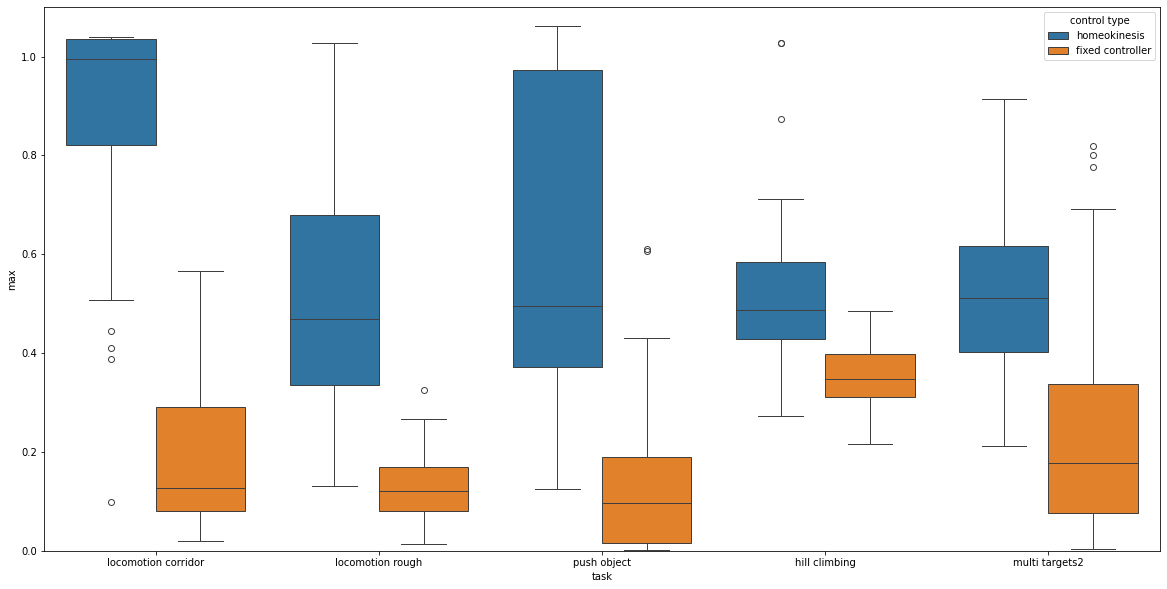

In [13]:
fig = plt.gcf()
fig.set_size_inches(20,10)
fg = sns.boxplot(data=ds_max_data,x="task",y="max",hue="control type")
fg.set(ylim=[0,1.1])

### Components distribution over performance

In [14]:
mehk_folder = "/home/leni/remote-folder/meim/hk3/"
mefc_folder = "/home/leni/remote-folder/mefc/"


In [15]:
parent_descs = []
for folder in os.listdir(mehk_folder):
    print(folder)
    parent_descs += [[folder] + elt[0:5] + [elt[5]*16,elt[6]*16,elt[7]*16,elt[8]*16] + [elt[9]] for elt in medf.load_feature_descriptor(mehk_folder + "/" + folder + "/morph_features.csv")]
par_desc_data1 = pd.DataFrame(data=parent_descs,columns=["replicate","robot id","width","depth","height","voxels","wheels","sensors","joints","casters","norm"])
par_desc_data1["control type"] = "homeokinesis"


meim_4_6_16-59-49-9078-3493767385
meim_4_6_16-59-52-2124-2763705642
meim_5_6_10-50-42-2727-1635008145
meim_5_6_11-17-16-6981-221913695
meim_5_6_7-15-41-1686-20808547
meim_6_6_0-23-4-4901-3236490257
meim_6_6_1-7-36-6550-3419932571
meim_6_6_5-13-15-5219-3432938375


In [16]:

parent_descs = []
for folder in os.listdir(mefc_folder):
    print(folder)
    parent_descs += [[folder] + elt[0:5] + [elt[5]*16,elt[6]*16,elt[7]*16,elt[8]*16] + [elt[9]] for elt in medf.load_feature_descriptor(mefc_folder + "/" + folder + "/morph_features.csv")]
par_desc_data2 = pd.DataFrame(data=parent_descs,columns=["replicate","robot id","width","depth","height","voxels","wheels","sensors","joints","casters","norm"])
par_desc_data2["control type"] = "fixed controller"


meim_28_4_11-28-51-1443-4031853478
meim_28_4_11-28-54-4846-1358932079
meim_28_4_11-28-57-7608-3617091664
meim_28_4_11-29-0-857-3681298804
meim_28_4_11-29-9-9642-416726483
meim_28_4_14-31-44-4230-3598983178
meim_28_4_19-42-29-9901-1413909619
meim_29_4_23-26-10-962-312197336
meim_29_4_23-3-27-7879-438409473
meim_30_4_2-47-50-415-2295905252
meim_30_4_3-22-55-5279-1110769008
meim_30_4_4-16-15-5993-3911015035
meim_30_4_8-18-32-2377-2908989017
meim_31_4_10-25-17-7843-2649367498
meim_31_4_12-15-41-1790-1095944290


In [17]:
par_desc_data = pd.concat([par_desc_data1,par_desc_data2])
ds_max_data = ds_max_data.merge(par_desc_data,how="inner",on=["robot id","replicate","control type"])
#data.drop_duplicates()

<Axes: xlabel='sensors', ylabel='max'>

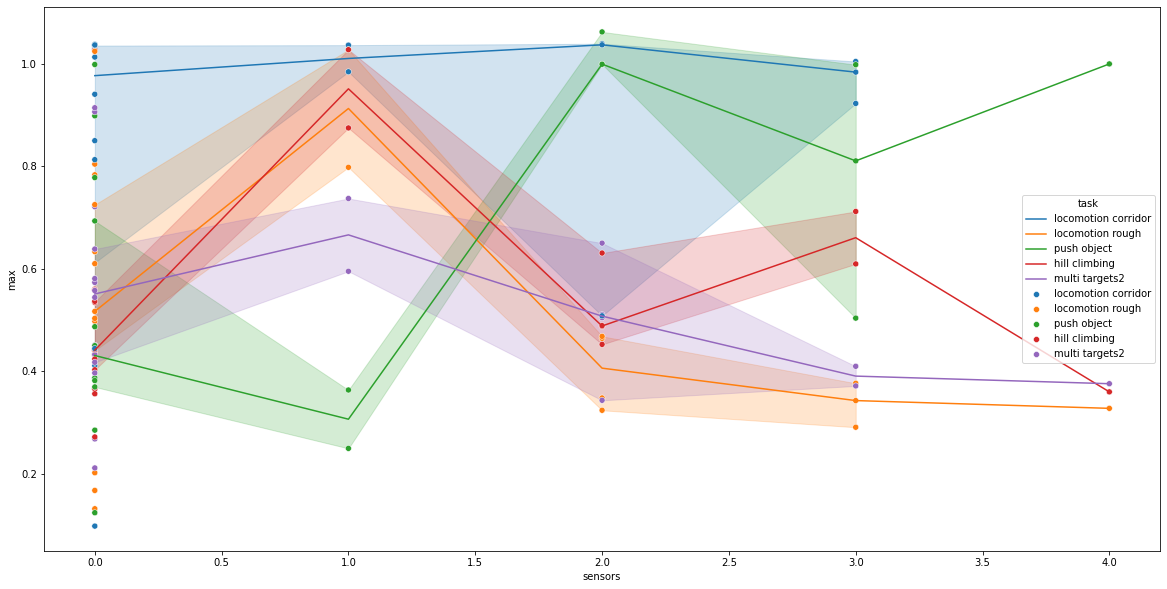

In [18]:
ctrl_type = "homeokinesis"
component = "sensors"
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task",estimator=np.median)
sns.scatterplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task")


<Axes: xlabel='wheels', ylabel='max'>

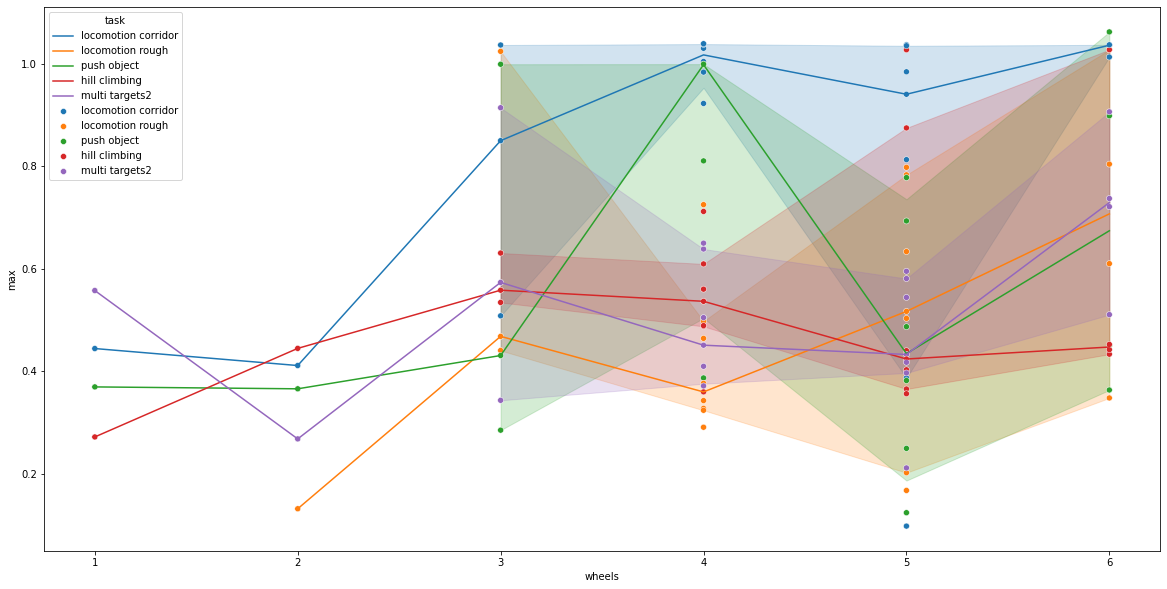

In [19]:
ctrl_type = "homeokinesis"
component = "wheels"
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task",estimator=np.median)
sns.scatterplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task")

<Axes: xlabel='joints', ylabel='max'>

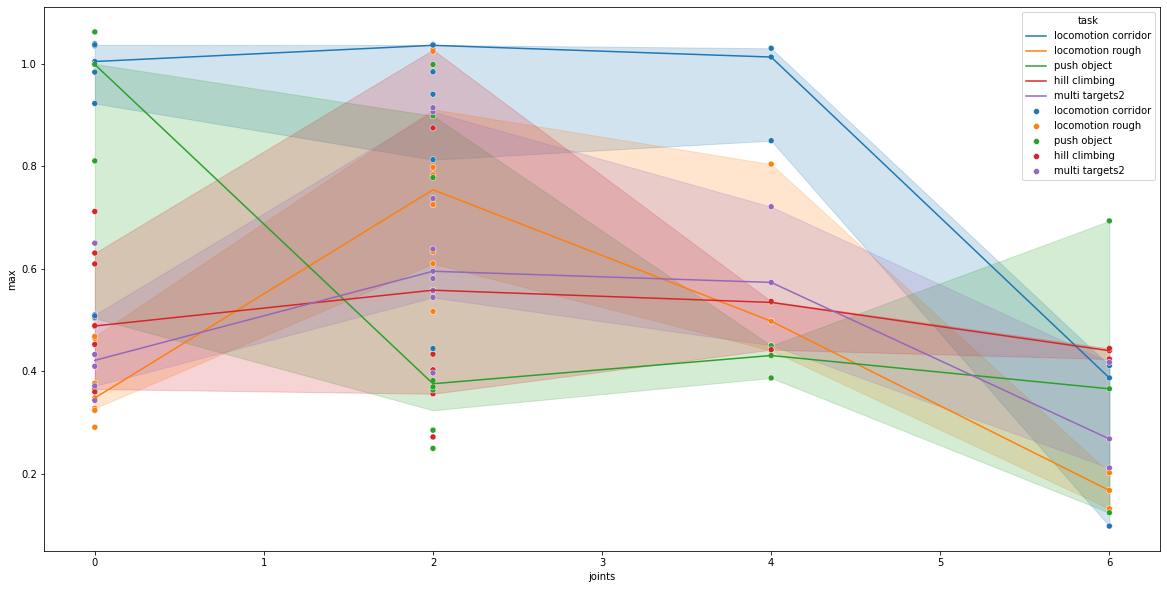

In [20]:
ctrl_type = "homeokinesis"
component = "joints"
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task",estimator=np.median)
sns.scatterplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task")

<Axes: xlabel='sensors', ylabel='max'>

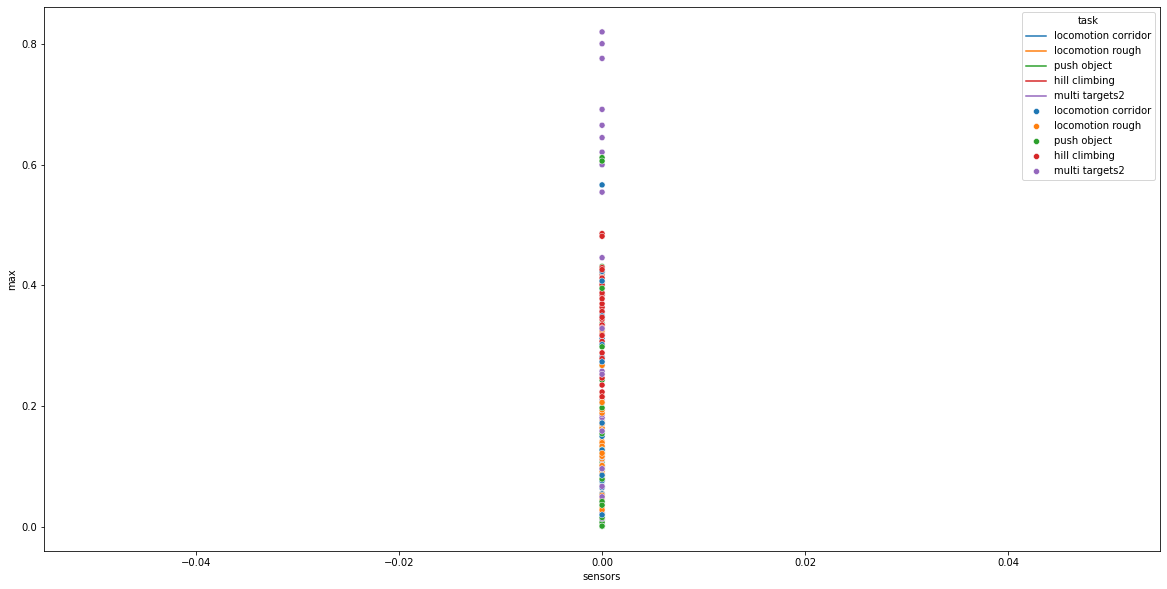

In [21]:
ctrl_type = "fixed controller"
component = "sensors"
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task",estimator=np.median)
sns.scatterplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task")


<Axes: xlabel='wheels', ylabel='max'>

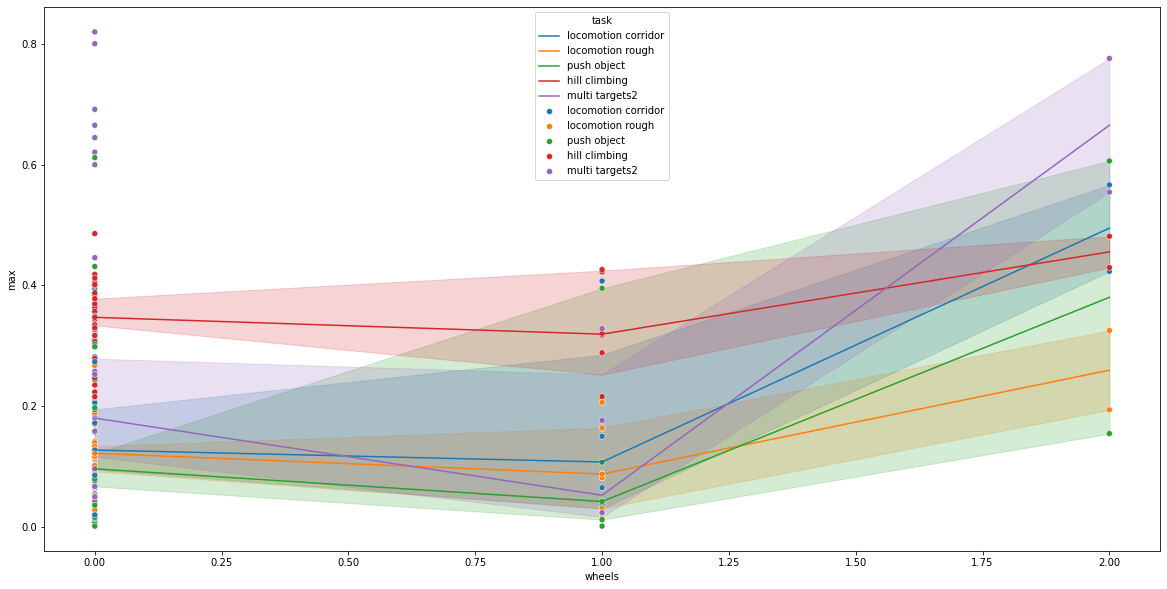

In [22]:
ctrl_type = "fixed controller"
component = "wheels"
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task",estimator=np.median)
sns.scatterplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task")

<Axes: xlabel='joints', ylabel='max'>

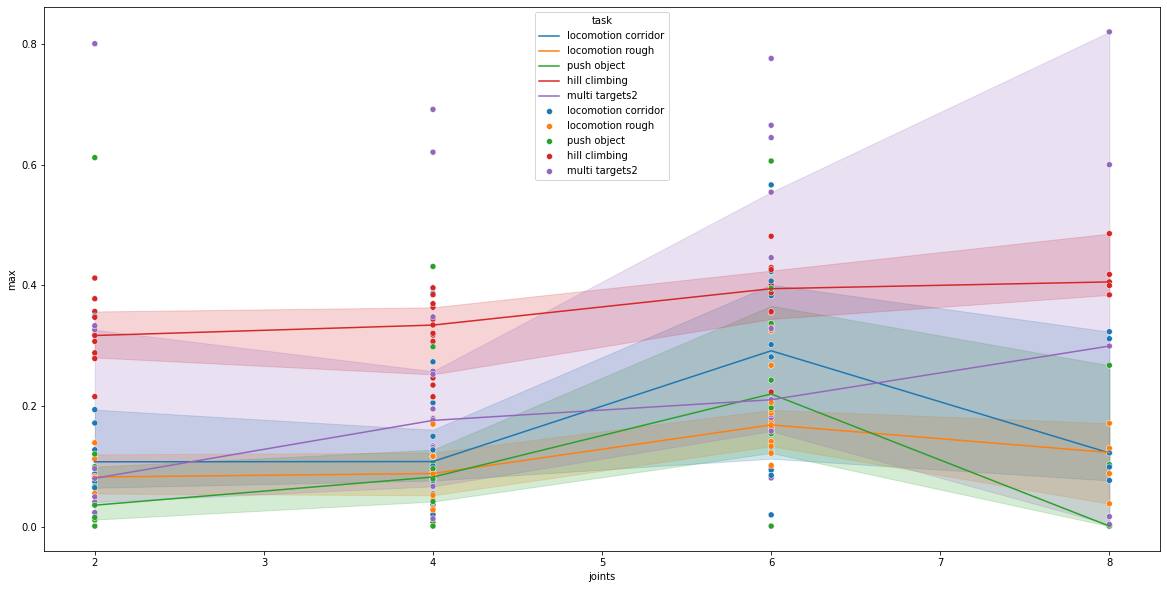

In [23]:
ctrl_type = "fixed controller"
component = "joints"
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task",estimator=np.median)
sns.scatterplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x=component,y="max",hue="task")

### Individual robots stats

(0.0, 1.1)

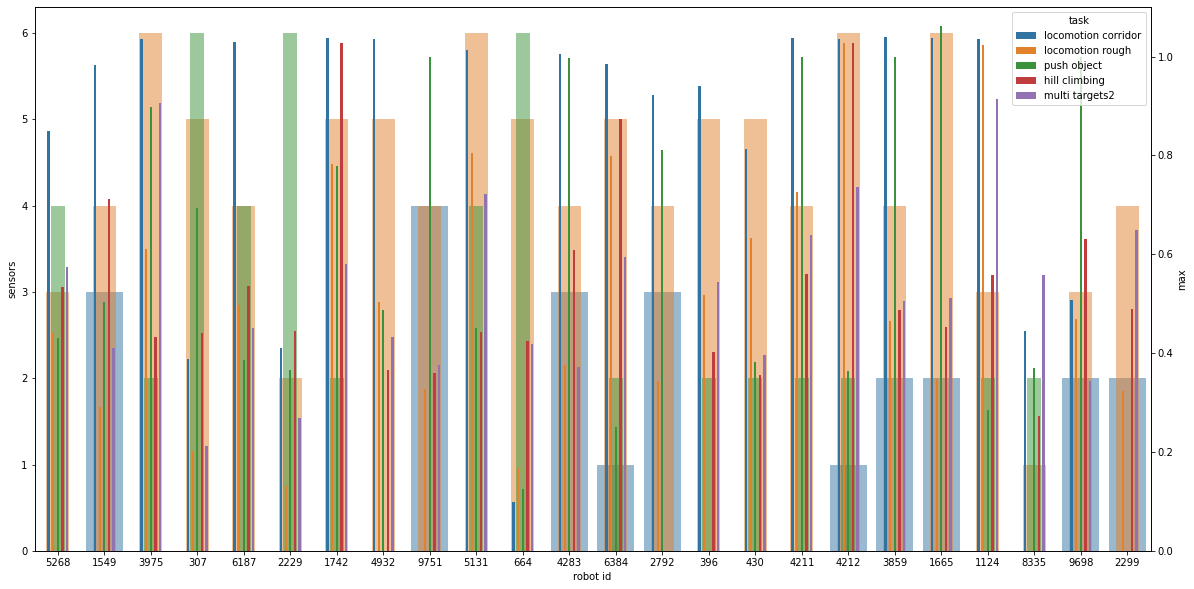

In [24]:
ctrl_type = "homeokinesis"
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.barplot(ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x="robot id",y="sensors",width=0.8,alpha=0.5,legend="full")
sns.barplot(ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x="robot id",y="wheels",width=0.5,alpha=0.5,legend="auto")
sns.barplot(ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x="robot id",y="joints",width=0.3,alpha=0.5,legend="auto")
ax = plt.twinx()
sns.barplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x="robot id",y="max",hue="task",ax=ax,dodge=True,width=0.5,gap=0.5)
ax.set_ylim([0,1.1])

(0.0, 1.1)

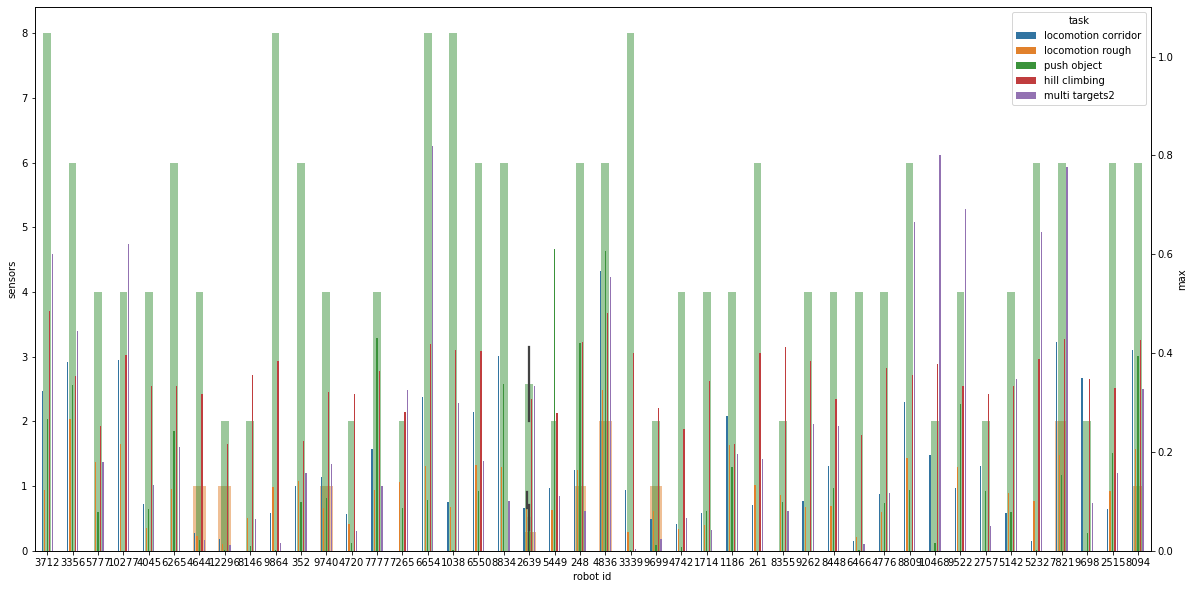

In [25]:
ctrl_type = "fixed controller"
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.barplot(ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x="robot id",y="sensors",width=0.8,alpha=0.5,legend="full")
sns.barplot(ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x="robot id",y="wheels",width=0.5,alpha=0.5,legend="auto")
sns.barplot(ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x="robot id",y="joints",width=0.3,alpha=0.5,legend="auto")
ax = plt.twinx()
sns.barplot(data=ds_max_data.loc[ds_max_data["control type"] == ctrl_type],x="robot id",y="max",hue="task",ax=ax,dodge=True,width=0.5,gap=0.5)
ax.set_ylim([0,1.1])

## MELAI

In [11]:
melai_folders = [["locomotion corridor","/home/leni/remote-folder/mnipes/loco_corr"],
                 ["locomotion rough","/home/leni/remote-folder/mnipes/loco_rough"]]

In [45]:
melai_fit_vec = []
for melai_folder in melai_folders:
    parent_fits = []
    for folder in os.listdir(melai_folder[1]):
        print(folder)
        parent_ids = medf.load_parent_pool(melai_folder[1] + "/" + folder + "/genomes_pool.csv")
        ids, parents, fitnesses, evals, deltas = medf.load_fitness(melai_folder[1] + "/" + folder + "/fitnesses.csv")
        fits = [[i,p[0],p[1],d,f,folder] for i, p, f, d in zip(ids,parents,fitnesses,deltas)]
        parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
    melai_fit_vec.append(pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","delta","fitness","replicate"]))
    melai_fit_vec[-1]["task"] = melai_folder[0]
melai_fit_data = pd.concat(melai_fit_vec)

mnipes2_6_7_16-22-35-5893-685460991
mnipes2_2_7_15-6-35-5870-629606296
mnipes2_6_7_16-22-42-2932-906352513
mnipes2_6_7_16-22-53-3049-3982975936
mnipes2_6_7_16-31-11-1488-1770225365
mnipes2_10_7_16-23-3-3283-904817647
mnipes2_11_7_16-23-32-2995-1223369004
mnipes2_6_7_16-15-51-1690-1040019169
mnipes2_6_7_17-32-48-8044-4110802384
mnipes2_9_7_17-33-18-8165-3145191907


/tmp/ipykernel_16024/2890434500.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melai_fit_data,x="iteration",y="fitness",hue="task",linestyle=":",estimator=np.max,ci=None,color='b')
/tmp/ipykernel_16024/2890434500.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melai_fit_data,x="iteration",y="fitness",hue="task",linestyle=":",estimator=np.min,ci=None,color='b')


<Axes: xlabel='iteration', ylabel='fitness'>

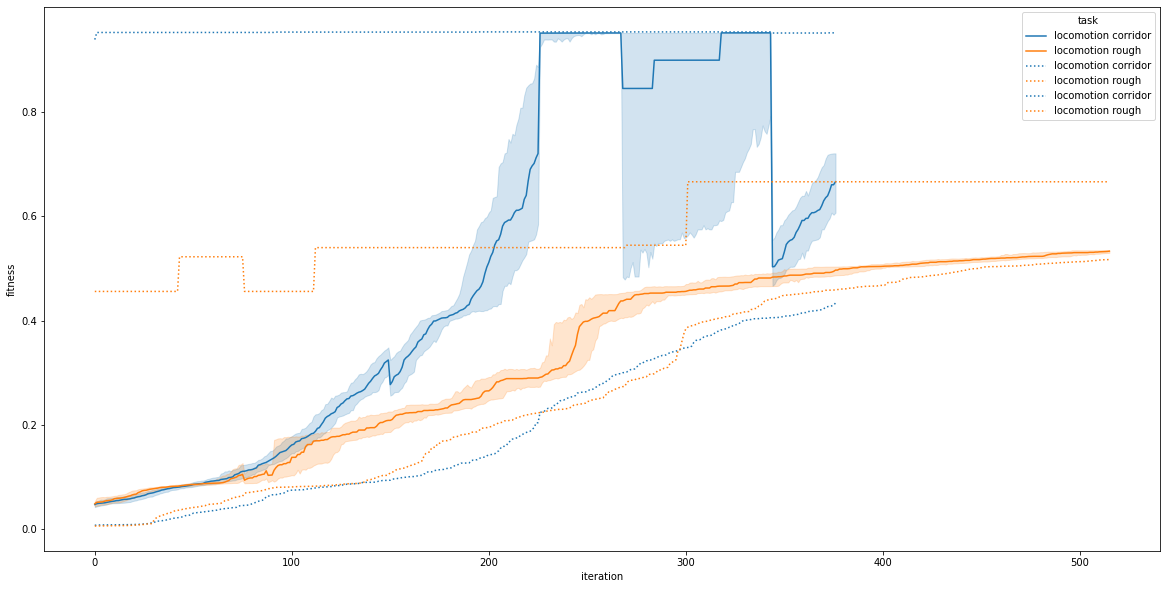

In [35]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=melai_fit_data,x="iteration",y="fitness",hue="task",estimator=np.median,color='b')
sns.lineplot(data=melai_fit_data,x="iteration",y="fitness",hue="task",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=melai_fit_data,x="iteration",y="fitness",hue="task",linestyle=":",estimator=np.min,ci=None,color='b')

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

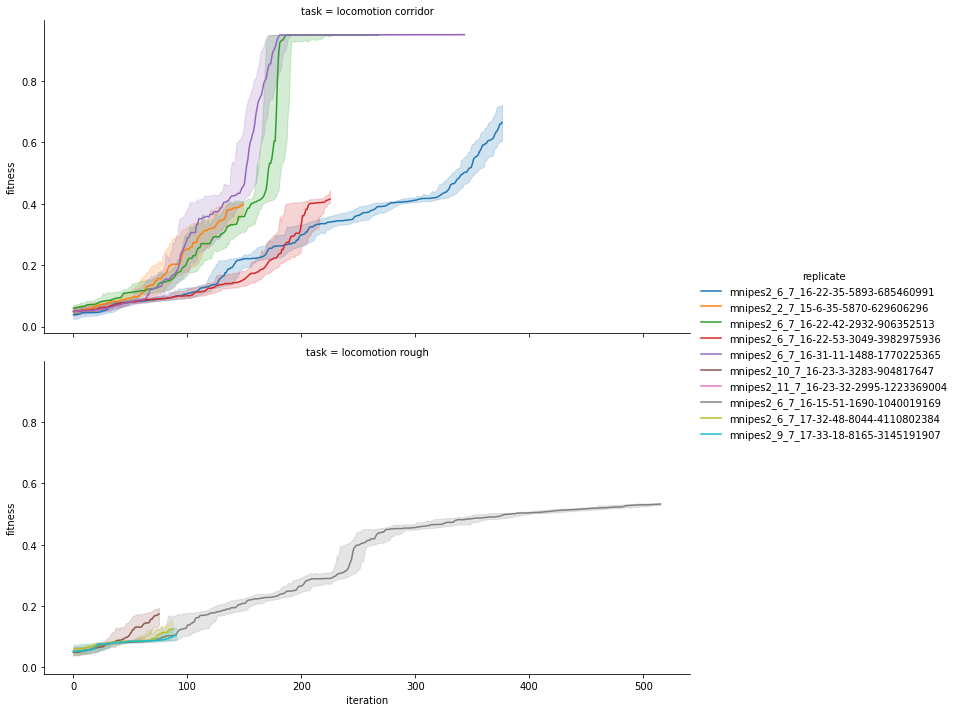

In [38]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.relplot(data=melai_fit_data,kind="line",x="iteration",y="fitness",hue="replicate",estimator=np.median,row="task",aspect=2)

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

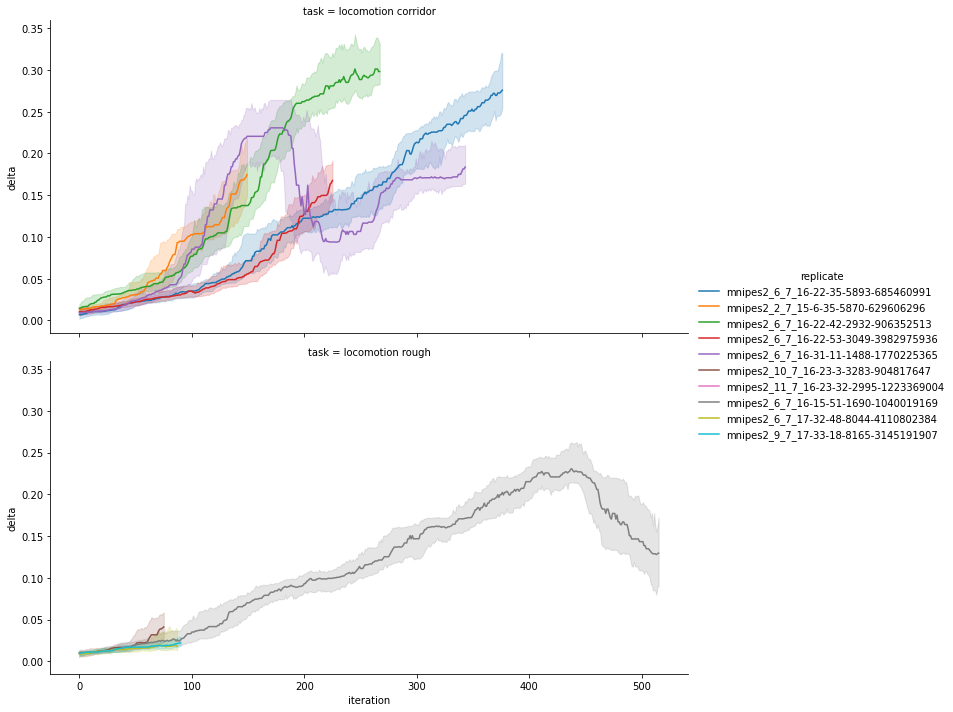

In [47]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.relplot(data=melai_fit_data,kind="line",x="iteration",y="delta",hue="replicate",estimator=np.median,row="task",aspect=2)

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

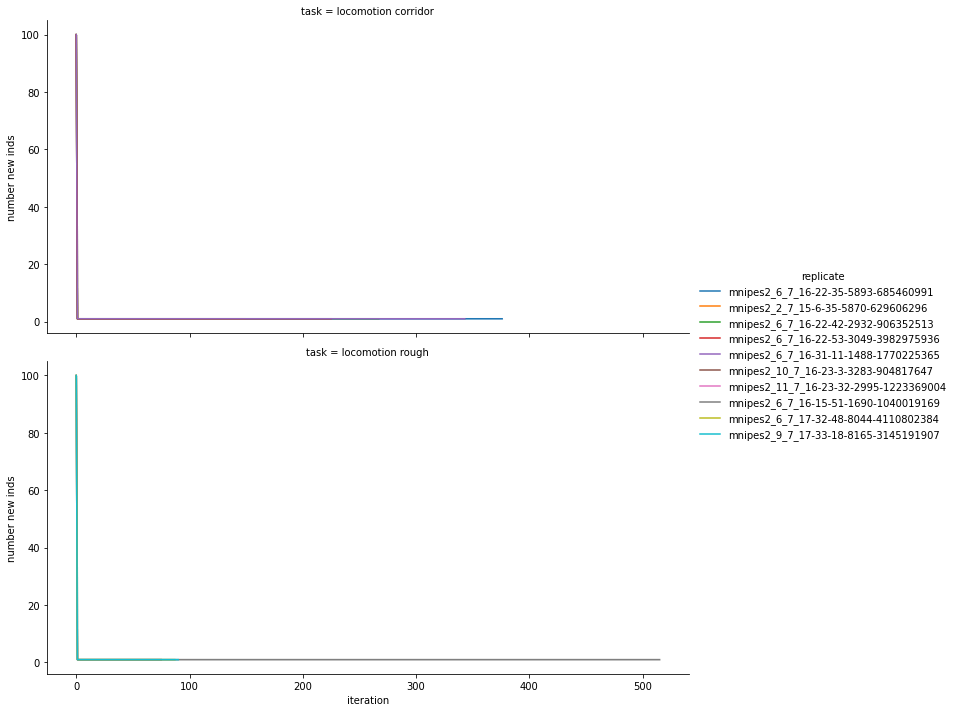

In [42]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.relplot(data=melai_fit_data,kind="line",x="iteration",y="number new inds",hue="replicate",estimator=np.median,row="task",aspect=2)

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

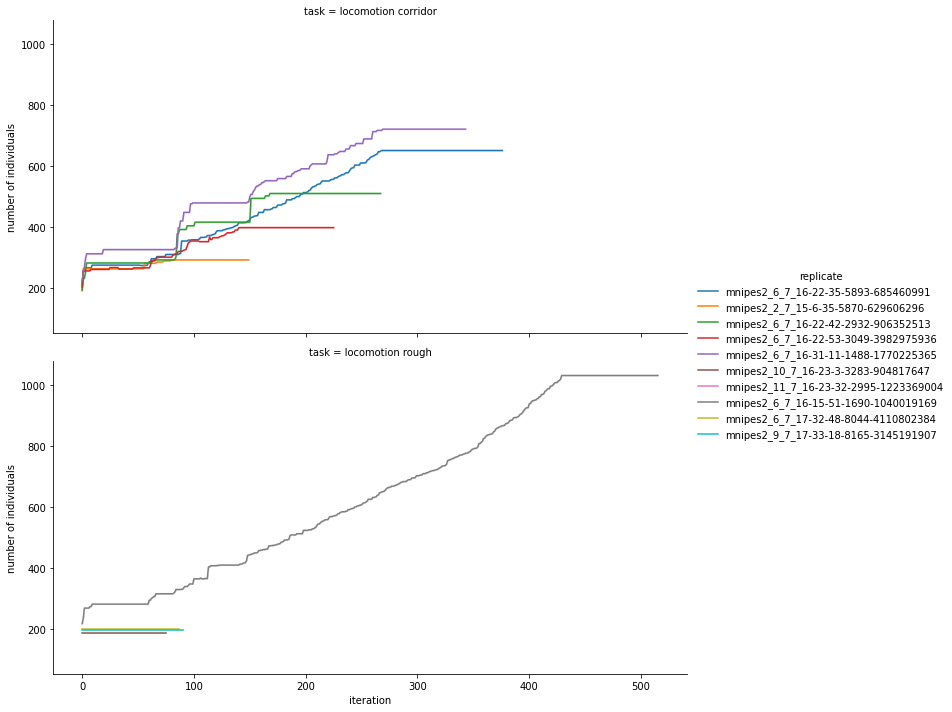

In [44]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.relplot(data=melai_fit_data,kind="line",x="iteration",y="number of individuals",hue="replicate",estimator=np.median,row="task",aspect=2)

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

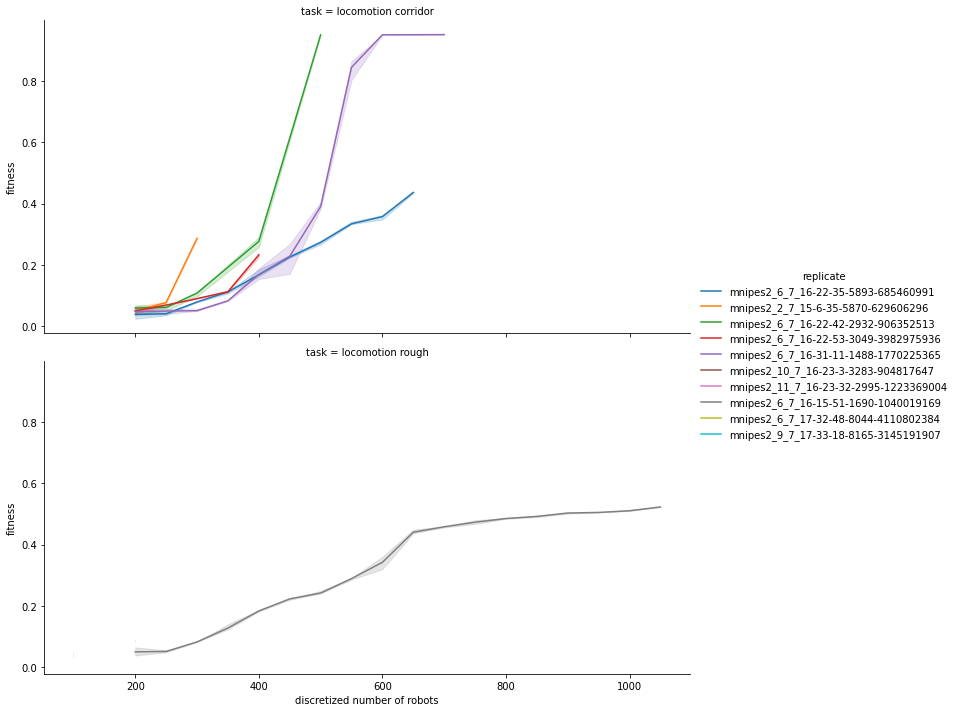

In [40]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.relplot(data=melai_fit_data,kind="line",x="discretized number of robots",y="fitness",hue="replicate",estimator=np.median,row="task",aspect=2)